# Business Case 2

## Predict Hotel Booking Cancellations

#### Made by:
* Catarina Candeias (m20200656@novaims.unl.pt)
* Catarina Urbano (m20200607@novaims.unl.pt)
* Margarida Pereira (m20201038@novaims.unl.pt)
* Rita Ferreira (m20200661@novaims.unl.pt)

### Table of contents:

* [1. Business Understanding](#1)
* [2. Data Understanding](#2)
* [3. Data Preparation](#3)
* [4. Modeling](#4)
    * [4.1. Build Model](#4.1)
        * [4.1.1. Model 1: RandomForestClassifier ](#4.1.1)
        * [<font color='red'>4.1.2. Model 2: RandomForestClassifier - Chosen Model</font>  ](#4.1.2)
        * [4.1.3. Model 3: DecisionTreeClassifier tuned using RandomizedSearchCV ](#4.1.3)
        * [4.1.4. Model 4: GradientBoostingClassifier](#4.1.4)      
        * [4.1.5. Model 5: GradientBoostingClassifier tuned using Randomized Search ](#4.1.5)
        * [4.1.6. Model 6: HistGradientBoostingClassifier  ](#4.1.6)
        * [4.1.7. Model 7: HistGradientBoostingClassifier tuned using Randomized Search ](#4.1.7)
        * [4.1.8. Model 8: StackingClassifier ](#4.1.8)
        * [4.1.9. Model 9: StackingClassifier](#4.1.9)
        * [4.1.10. Model 10: Deep neural network 1](#4.1.10)
        * [4.1.11. Model 11: Deep neural network 2 ](#4.1.11)
        * [4.1.12. Model 12: Deep neural network 3](#4.1.12)
* [5. Evaluation](#5)
* [6. Deployment](#6)

# 1. Business Understanding <a class="anchor" id="1"></a>

This section can be seen in detail in our report

# 2. Data Understanding <a class="anchor" id="2"></a>

#### Imports 

In [2]:
import os
from pathlib import Path
import pandas as pd
# import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


sns.set_style(style='white')

import warnings
warnings.filterwarnings("always", message='',category=FutureWarning)

#to show all columns and rows when displaying a dataframe
pd.set_option('display.max_columns', None)

import math
from scipy.stats import randint as sp_randint
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifierCV, LassoCV, RidgeCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier,StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC, LinearSVC

import time
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers
import plotly.express as px
import plotly.graph_objects as go
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import joblib

# Defining PROJECT_ROOT
PROJECT_ROOT = Path(os.path.abspath('')).resolve().parents[0]

In [3]:
# Load data 
# df = pd.read_csv('H2.csv', sep=',')
df = pd.read_csv(os.path.join(PROJECT_ROOT, 'data', 'H2.csv'))
print('shape:',df.shape)
df.head()

shape: (79330, 31)


IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  Babies       Meal Country  \
0                  2       1       0.0       0  HB            PRT   
1                  4       2       0.0       0  BB            PRT   
2                  4       1       0.0       0  BB            PRT   
3                  4       2       0.0       0  BB            PRT   
4                  2       2       0.0       0  BB            PRT   

   MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  \
0  Offline TA/TO               TA/TO                0                      0   
1      Online TA               TA/TO                0                      0   
2      Online TA               TA/TO                0                      0   
3      Online TA               TA/TO                0                      0   
4      Online TA               TA/TO                0                      0   

   PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  \
0                            0  A                 A                  
1                            0  A                 A                  
2                            0  A                 A                  
3                            0  A                 A                  
4                            0  A                 A                  

   BookingChanges      DepositType        Agent      Company  \
0               0  No Deposit                 6         NULL   
1               0  No Deposit                 9         NULL   
2               0  No Deposit                 9         NULL   
3               0  No Deposit                 9         NULL   
4               0  No Deposit                 9         NULL   

   DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0                  0    Transient   0.0                         0   
1                  0    Transient  76.5                         0   
2                  0    Transient  68.0                         0   
3                  0    Transient  76.5                         0   
4                  0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02

In [4]:
# Get the row and column count,columns and their datatypes and presence of null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [5]:
df.drop_duplicates().shape #Considered ok

(53428, 31)

In [6]:
# Check for missing values:
display(df.isna().sum())

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [7]:
df.describe().T

count         mean         std     min     25%  \
IsCanceled                   79330.0     0.417270    0.493111     0.0     0.0   
LeadTime                     79330.0   109.735724  110.948526     0.0    23.0   
ArrivalDateYear              79330.0  2016.174285    0.699181  2015.0  2016.0   
ArrivalDateWeekNumber        79330.0    27.177449   13.398523     1.0    17.0   
ArrivalDateDayOfMonth        79330.0    15.786625    8.728451     1.0     8.0   
StaysInWeekendNights         79330.0     0.795185    0.885026     0.0     0.0   
StaysInWeekNights            79330.0     2.182957    1.456416     0.0     1.0   
Adults                       79330.0     1.850977    0.509292     0.0     2.0   
Children                     79326.0     0.091370    0.372177     0.0     0.0   
Babies                       79330.0     0.004941    0.084323     0.0     0.0   
IsRepeatedGuest              79330.0     0.025615    0.157983     0.0     0.0   
PreviousCancellations        79330.0     0.079743    0.415472     0.0     0.0   
PreviousBookingsNotCanceled  79330.0     0.132371    1.693411     0.0     0.0   
BookingChanges               79330.0     0.187369    0.608620     0.0     0.0   
DaysInWaitingList            79330.0     3.226774   20.870890     0.0     0.0   
ADR                          79330.0   105.304465   43.602954     0.0    79.2   
RequiredCarParkingSpaces     79330.0     0.024367    0.154919     0.0     0.0   
TotalOfSpecialRequests       79330.0     0.546918    0.780776     0.0     0.0   

                                50%     75%     max  
IsCanceled                      0.0     1.0     1.0  
LeadTime                       74.0   163.0   629.0  
ArrivalDateYear              2016.0  2017.0  2017.0  
ArrivalDateWeekNumber          27.0    38.0    53.0  
ArrivalDateDayOfMonth          16.0    23.0    31.0  
StaysInWeekendNights            1.0     2.0    16.0  
StaysInWeekNights               2.0     3.0    41.0  
Adults                          2.0     2.0     4.0  
Children                        0.0     0.0     3.0  
Babies                          0.0     0.0    10.0  
IsRepeatedGuest                 0.0     0.0     1.0  
PreviousCancellations           0.0     0.0    21.0  
PreviousBookingsNotCanceled     0.0     0.0    72.0  
BookingChanges                  0.0     0.0    21.0  
DaysInWaitingList               0.0     0.0   391.0  
ADR                            99.9   126.0  5400.0  
RequiredCarParkingSpaces        0.0     0.0     3.0  
TotalOfSpecialRequests          0.0     1.0     5.0

#### Visualizations

Text(0, 0.5, 'Percent')

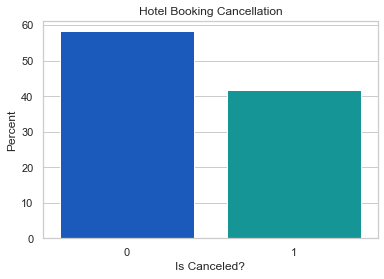

In [8]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.barplot(x="IsCanceled", y="IsCanceled", palette = 'winter',  data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Percent')

In [9]:
x = df.groupby('MarketSegment')['IsCanceled'].mean()
x

MarketSegment
Aviation         0.219409
Complementary    0.118081
Corporate        0.214668
Direct           0.173314
Groups           0.688587
Offline TA/TO    0.428316
Online TA        0.373981
Undefined        1.000000
Name: IsCanceled, dtype: float64

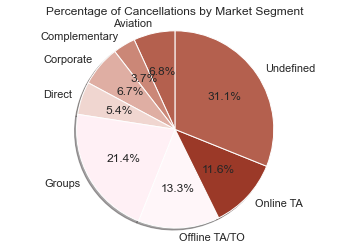

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = x.index
values = x.values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors = [ "#b4604e", "#cb8777", "#dfaea3", "#f0d6d0", "#fff0f5", "#fff6f9",'#9b3928'])

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax1.set_title("Percentage of Cancellations by Market Segment")

plt.show()

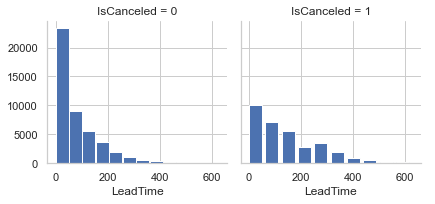

In [11]:
# Lead time and cancelations

grid = sns.FacetGrid(df, col='IsCanceled')
grid.map(plt.hist, 'LeadTime', width=50)
grid.add_legend()

<AxesSubplot:xlabel='LeadTime', ylabel='Count'>

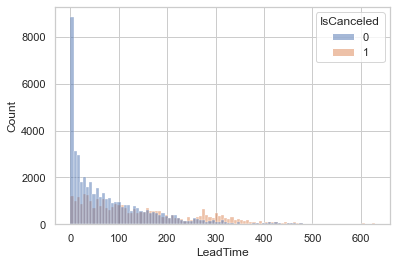

In [12]:
sns.histplot(data=df, x="LeadTime",hue='IsCanceled')

##### Function to update the Metric and Non-Metric Variables

In [13]:
def update_metric_feat(df):
    metric_features = df.select_dtypes(include=np.number).columns.tolist()
    non_metric_features = df.select_dtypes(exclude=np.number).columns.tolist()
    if 'IsCanceled' in metric_features:
        metric_features.remove('IsCanceled')
    if ('IsRepeatedGuest' in metric_features):
        metric_features.remove('IsRepeatedGuest')
        if ('IsRepeatedGuest' in df.columns):
            non_metric_features=non_metric_features+['IsRepeatedGuest']
    return metric_features,non_metric_features

metric_features = update_metric_feat(df)[0]
non_metric_features = update_metric_feat(df)[1]

### Metric Features analysis

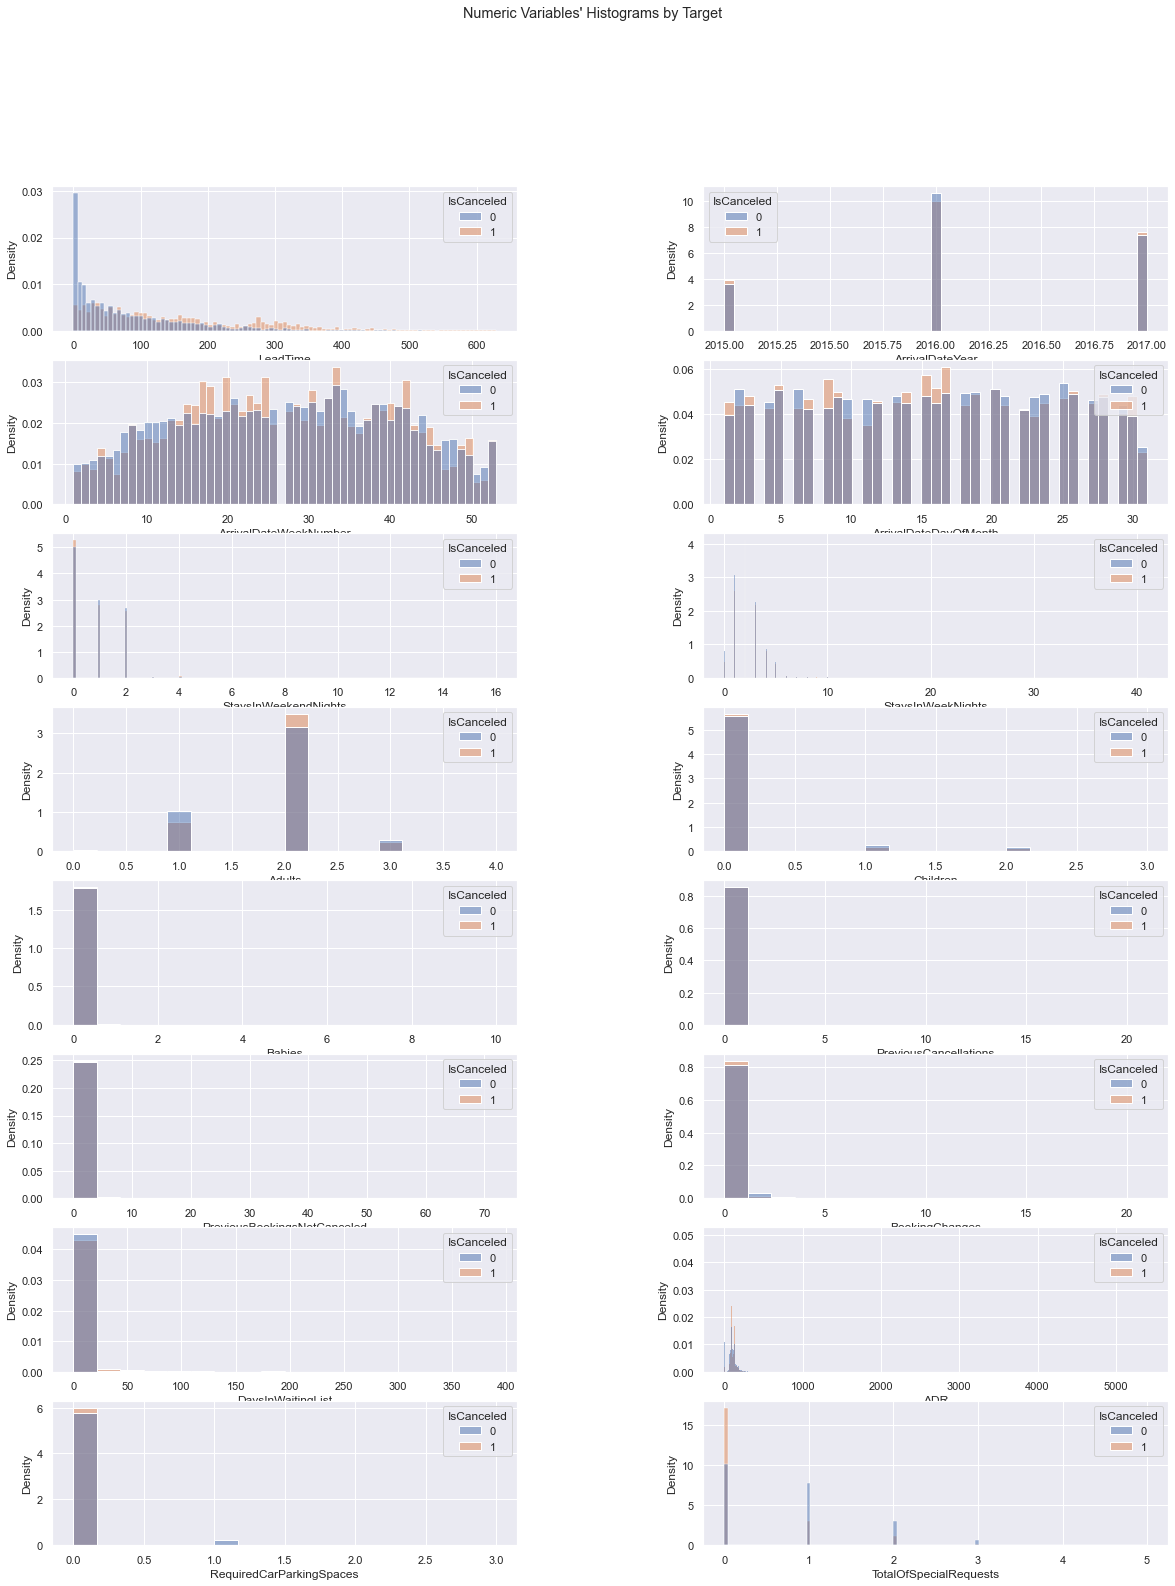

In [14]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(ceil(len(metric_features) / 2),2, figsize=(20, 25))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], hue=df['IsCanceled'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

### Correlation

In [15]:
def _color_red_or_green(val):
    if (val < -0.3) and (val!=-1):
        color = 'background-color: red'
    elif (val > 0.3) and (val!=1):
        color = 'background-color: green'
    else:
        color = ''
    return color
correl=df.corr()
correl.style.applymap(_color_red_or_green)

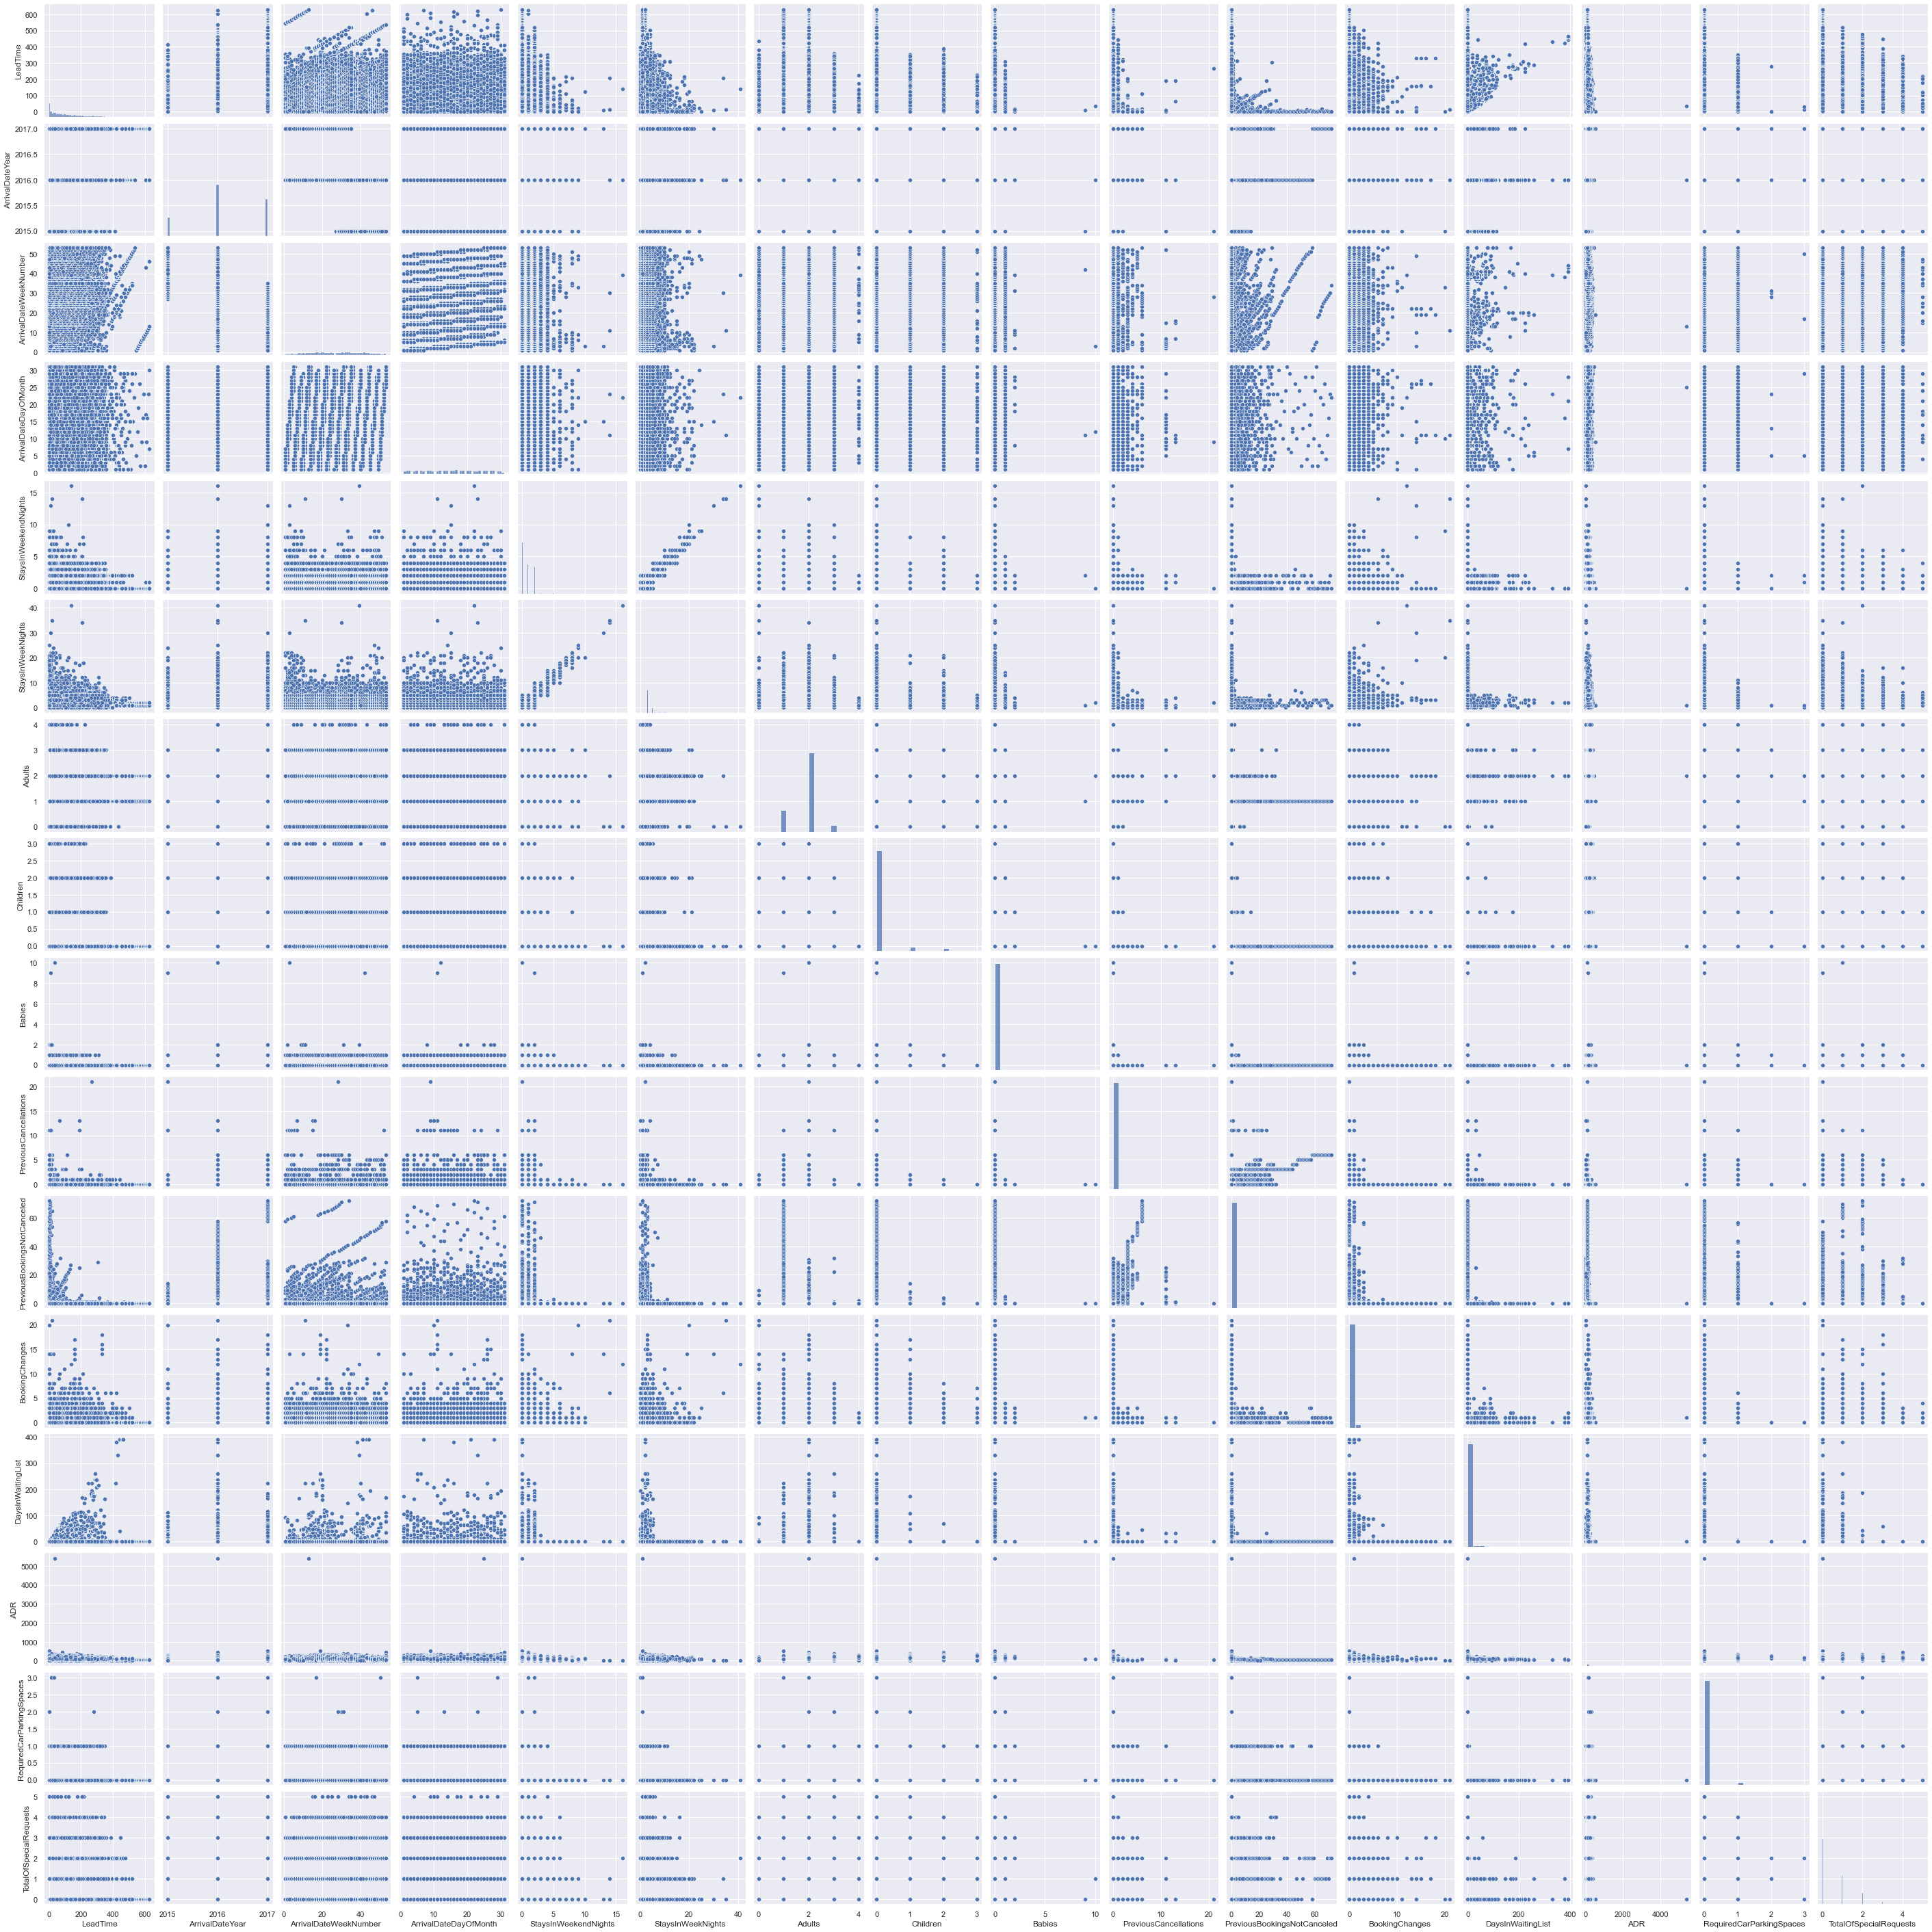

In [16]:
sns.pairplot(df[metric_features])

## 3. Data Preparation <a class="anchor" id="3"></a>

### Clean Data

In [17]:
# removing white spaces at the beginning of strings, and in the end in case there is any
for col in non_metric_features:
    df[col]=df[col].apply(lambda x: x.rstrip().lstrip() if type(x)==str else x)  

###### Missing Values

In [18]:
# % of missing values
cols = df.columns[df.isnull().mean()!=0]
display(pd.DataFrame(df[cols].isnull().mean()*100, columns=['% Missing Values']).sort_values(by='% Missing Values',ascending=False))

# Agent ->ID of the travel agency that made the booking
# most likely the null values are cases when a travel agency wasn´t involved in the booking
# Company->ID of the company/entity that made the booking or responsible for paying the booking. 
# most likely the null values are cases when a company wasn´t involved

df['Agent'].fillna('No agent',inplace=True)
df['Company'].fillna('No company',inplace=True)

# replace null values in Country for the value 'Unknown':
df['Country'].fillna('Unknown',inplace=True)
# replace null values in 'children' to 0 since there are only a few
df['Children'].fillna(0,inplace=True)

# change type of Children from float to int
df['Children']=df['Children'].astype(int)

metric_features = update_metric_feat(df)[0]
non_metric_features = update_metric_feat(df)[1]

% Missing Values
Country           0.030253
Children          0.005042

### Feature Engineering

In [19]:
#ArrivalDate
MonthDict={ "January": '01' ,"February"  :'02' ,  "March":'03' ,  "April":'04' , "May": '05' ,  "June":'06' ,  "July":'07' ,  "August":'08' ,  "September":'09' , "October":'10'  ,  "November":'11' ,  "December":'12' }

df['ArrivalDateMonth_number']=df['ArrivalDateMonth'].map(MonthDict)
df[ "ArrivalDateDayOfMonth"]=df[ "ArrivalDateDayOfMonth"].astype(str)
df["ArrivalDateYear"]=df["ArrivalDateYear"].astype(str)

df['ArrivalDate']=df["ArrivalDateYear"]+'-'+df["ArrivalDateMonth_number"]+'-'+df["ArrivalDateDayOfMonth"]
df['ArrivalDate']=pd.to_datetime(df['ArrivalDate'])

In [20]:
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate'])

In [21]:
df.drop(columns=['ReservationStatus','ReservationStatusDate'], inplace=True)

Changing data type of the variables 'ArrivalDateYear','ArrivalDateDayOfMonth' to int

In [22]:
df[['ArrivalDateYear','ArrivalDateDayOfMonth']] = df[['ArrivalDateYear','ArrivalDateDayOfMonth']].astype('int64')

#### New variable CRate-> cancelation rate

In [23]:
cancelamentos = df['PreviousCancellations']/(df['PreviousCancellations']+df['PreviousBookingsNotCanceled'])
cancelamentos.fillna(0, inplace=True)
df.insert(4, 'CRate', cancelamentos)

metric_features = update_metric_feat(df)[0]
non_metric_features = update_metric_feat(df)[1]

df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  CRate  \
0           0         6             2015             July    0.0   
1           1        88             2015             July    0.0   
2           1        65             2015             July    0.0   
3           1        92             2015             July    0.0   
4           1       100             2015             July    0.0   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  Babies Meal Country  MarketSegment  \
0                  2       1         0       0   HB     PRT  Offline TA/TO   
1                  4       2         0       0   BB     PRT      Online TA   
2                  4       1         0       0   BB     PRT      Online TA   
3                  4       2         0       0   BB     PRT      Online TA   
4                  2       2         0       0   BB     PRT      Online TA   

  DistributionChannel  IsRepeatedGuest  PreviousCancellations  \
0               TA/TO                0                      0   
1               TA/TO                0                      0   
2               TA/TO                0                      0   
3               TA/TO                0                      0   
4               TA/TO                0                      0   

   PreviousBookingsNotCanceled ReservedRoomType AssignedRoomType  \
0                            0                A                A   
1                            0                A                A   
2                            0                A                A   
3                            0                A                A   
4                            0                A                A   

   BookingChanges DepositType Agent Company  DaysInWaitingList CustomerType  \
0               0  No Deposit     6    NULL                  0    Transient   
1               0  No Deposit     9    NULL                  0    Transient   
2               0  No Deposit     9    NULL                  0    Transient   
3               0  No Deposit     9    NULL                  0    Transient   
4               0  No Deposit     9    NULL                  0    Transient   

    ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  \
0   0.0                         0                       0   
1  76.5                         0                       1   
2  68.0                         0                       1   
3  76.5                         0                       2   
4  76.5                         0                       1   

  ArrivalDateMonth_number ArrivalDate  
0                      07  2015-07-01  
1                      07  2015-07-01  
2                      07  2015-07-01  
3                      07  2015-07-01  
4                      07  2015-07-02

<AxesSubplot:xlabel='CRate', ylabel='Count'>

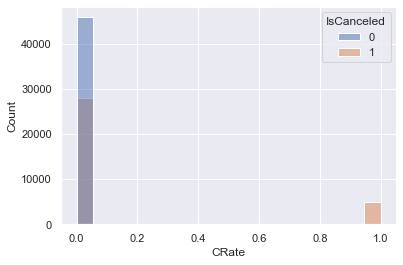

In [24]:
sns.histplot(data=df, x="CRate",hue='IsCanceled')

### Categorical Variables

In [25]:
#Auxiliary Function
def bar_charts_categorical(df, feature, target,order=None):
    if order==None:
        cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    else: 
        cont_tab=pd.crosstab(df[feature], df[target], margins = True).loc[order+['All'],:]
    
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    
    
    
    
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation=90)
    plt.show()

### Plotting the cardinality of each variable

In [26]:
df[non_metric_features].nunique()

ArrivalDateMonth            12
Meal                         4
Country                    167
MarketSegment                8
DistributionChannel          5
ReservedRoomType             8
AssignedRoomType             9
DepositType                  3
Agent                      224
Company                    208
CustomerType                 4
ArrivalDateMonth_number     12
ArrivalDate                793
IsRepeatedGuest              2
dtype: int64

Text(0.5, 1.0, 'Cardinality')

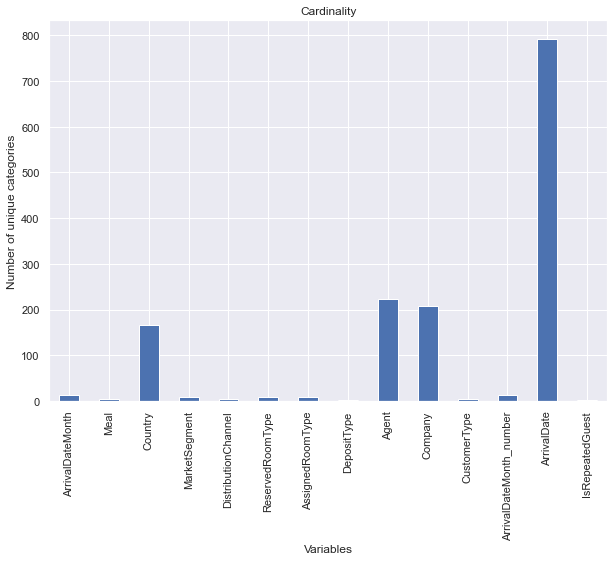

In [27]:
# plot with the cardinality of each variable

df[non_metric_features].nunique().plot.bar(figsize=(10,7))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

#### Variable Country

In [28]:
pd.DataFrame(df.groupby(['Country','IsCanceled']).size()).sort_values(by=0,ascending=False).rename(columns={0:'Count'})

Count
Country IsCanceled       
PRT     1           20081
        0           10879
FRA     0            7081
DEU     0            5012
GBR     0            3753
...                   ...
SYC     0               1
HND     1               1
TGO     0               1
GUY     0               1
TJK     0               1

[277 rows x 1 columns]

In [29]:
CountryProp = df.groupby('Country')['IsCanceled'].sum()/df.groupby('Country')['IsCanceled'].count()
CountryProp

Country
ABW    0.000000
AGO    0.585799
AIA    0.000000
ALB    0.111111
AND    1.000000
         ...   
VGB    1.000000
VNM    0.333333
ZAF    0.419355
ZMB    1.000000
ZWE    1.000000
Name: IsCanceled, Length: 167, dtype: float64

In [30]:
fig = px.scatter_geo(CountryProp, locations=CountryProp.index, #color="continent",
                     hover_name=CountryProp.index, size=CountryProp.values,
                     #animation_frame="year",
                     projection="natural earth")
fig.show()

In [31]:
data_choropleth = dict(type='choropleth',
                       locations=CountryProp.index,  #There are three ways to 'merge' your data with the data pre embedded in the map
                       locationmode='ISO-3',
                       z=CountryProp.values,
                       text=CountryProp.index,
                       colorscale='reds'
                      )


layout_choropleth = dict(geo=dict(scope='europe',  #default
                                  projection=dict(type='orthographic'
                                                 ),
                                  #showland=True,   # default = True
                                  landcolor='white',
                                  lakecolor='white',
                                  showocean=True,   # default = False
                                  oceancolor='azure'
                                 ),
                         
                         title=dict(text='',
                                    x=.5 # Title relative position according to the xaxis, range (0,1)
                                   )
                        )



In [32]:
fig_choropleth = go.Figure(data=data_choropleth, layout=layout_choropleth)

fig_choropleth.show()

In [33]:
data_choropleth = dict(type='choropleth',
                       locations=CountryProp.index,  #There are three ways to 'merge' your data with the data pre embedded in the map
                       locationmode='ISO-3',
                       z=CountryProp.values,
                       text=CountryProp.index,
                       colorscale='reds'
                      )


layout_choropleth = dict(geo=dict(scope='world',  #default
                                  projection=dict(type='orthographic'
                                                 ),
                                  #showland=True,   # default = True
                                  landcolor='white',
                                  lakecolor='white',
                                  showocean=True,   # default = False
                                  oceancolor='azure'
                                 ),
                         
                         title=dict(text='',
                                    x=.5 # Title relative position according to the xaxis, range (0,1)
                                   )
                        )

In [34]:
fig_choropleth = go.Figure(data=data_choropleth, layout=layout_choropleth)

fig_choropleth.show()

##### Variable Company 


In some categorical variables like Agent or Company, NULL is presented as one of the categories. This should not be considered a missing value, but rather as not applicable. For example, if a booking Agent is defined as NULL it means that the booking did not come from a travel agent.

In [35]:
pd.DataFrame(df.groupby(['Company','IsCanceled']).size()).sort_values(by=0,ascending=False).rename(columns={0:'Count'})

Count
Company IsCanceled       
NULL    0           43323
        1           32318
40      0             847
45      0             222
67      1             175
...                   ...
313     0               1
312     0               1
309     1               1
308     0               1
330     0               1

[266 rows x 1 columns]

##### Variable Agent

In [36]:
pd.DataFrame(df.groupby(['Agent','IsCanceled']).size()).sort_values(by=0,ascending=False).rename(columns={0:'Count'})

Count
Agent IsCanceled       
9     0           18693
      1           13262
NULL  0            5522
1     1            5230
7     0            3065
...                 ...
315   1               1
306   0               1
303   0               1
289   0               1
294   0               1

[341 rows x 1 columns]

#### Variable Meal

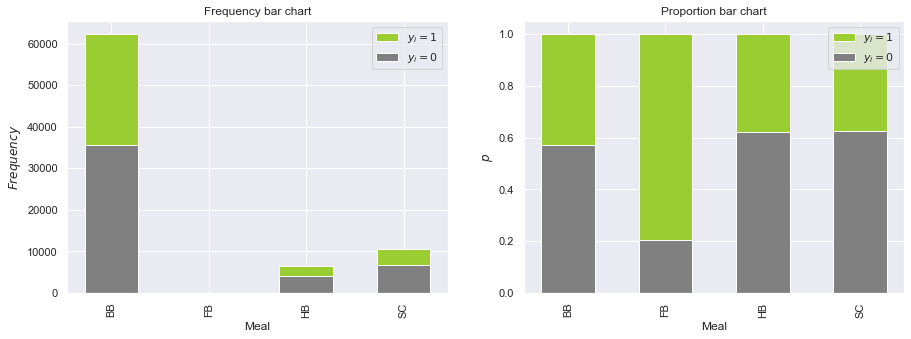

In [37]:
bar_charts_categorical(df,"Meal", 'IsCanceled')

In [38]:
### Merging the categories BB and HB into one
df["Meal"] = df["Meal"].map(lambda x: "1 and 2 meal packages" if (x=='HB') |(x=='BB') else x)

#### Variable MarketSegment

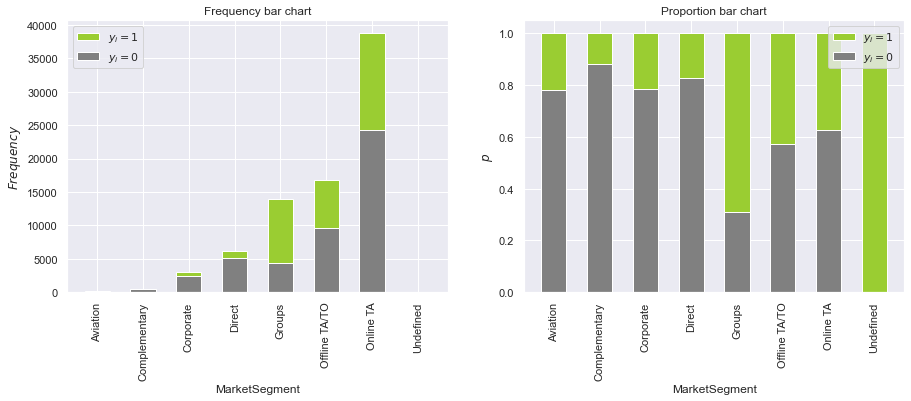

In [39]:
bar_charts_categorical(df,"MarketSegment", 'IsCanceled')

In [40]:
## **Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

#### Variable DistributionChannel

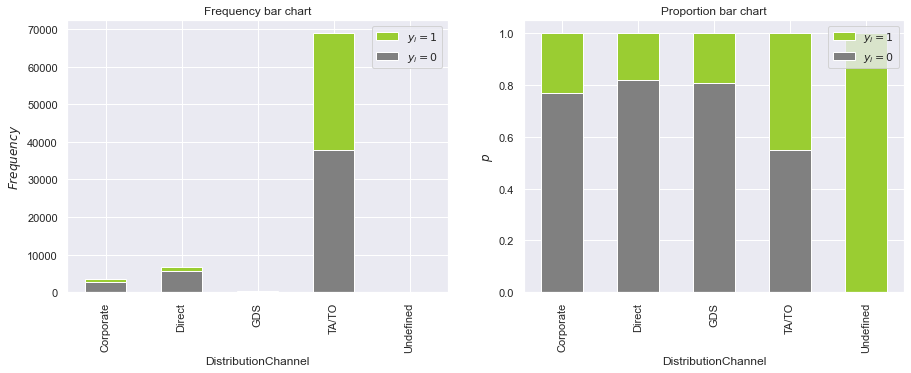

In [41]:
bar_charts_categorical(df,"DistributionChannel", 'IsCanceled')

 **Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

#### Variable DepositType

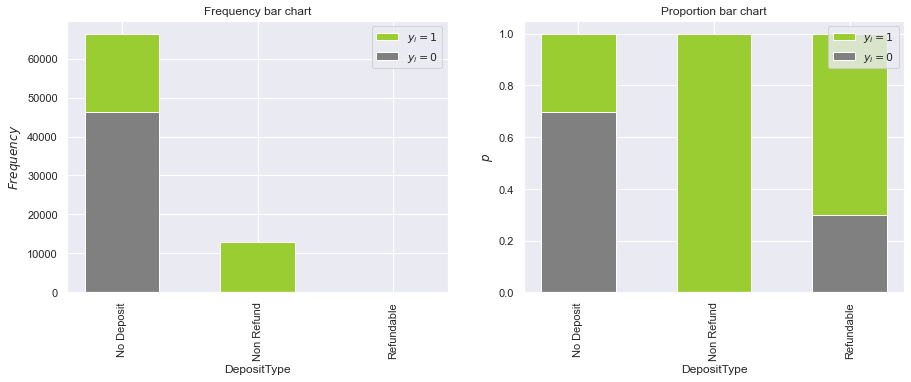

In [42]:
bar_charts_categorical(df,"DepositType", 'IsCanceled')

In [43]:
len(df.loc[df['DepositType']=='Refundable'])

20

DepositType categories:

- No Deposit – no deposit was made;

- Non Refund – a deposit was made in the value of the total stay cost;

- Refundable – a deposit was made with a value under the total cost of stay.

#### Variable CustomerType

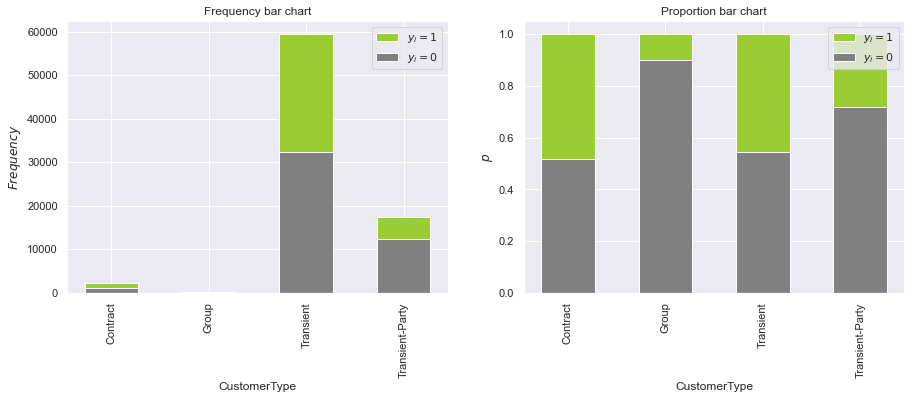

In [44]:
bar_charts_categorical(df,"CustomerType", 'IsCanceled') 

CustomerType categories:

* Contract - when the booking has an allotment or other type of contract associated to it;
* Group – when the booking is associated to a group;
* Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
* Transient-party – when the booking is transient, but is associated to at least other transient booking

#### Variable ArrivalDateYear

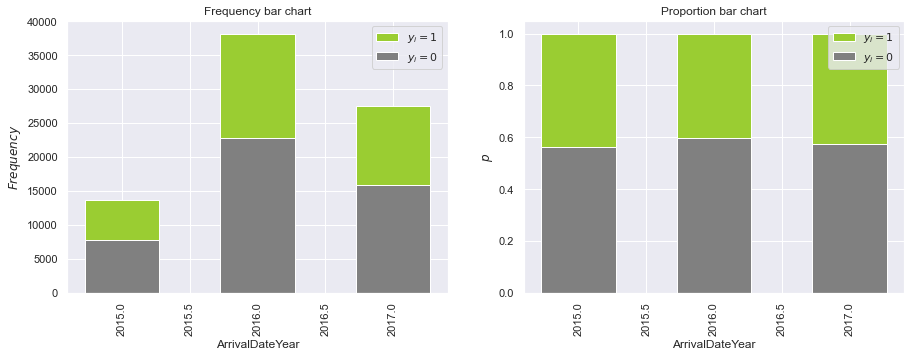

In [45]:
bar_charts_categorical(df,"ArrivalDateYear", 'IsCanceled')

#### Variable ArrivalDateMonth

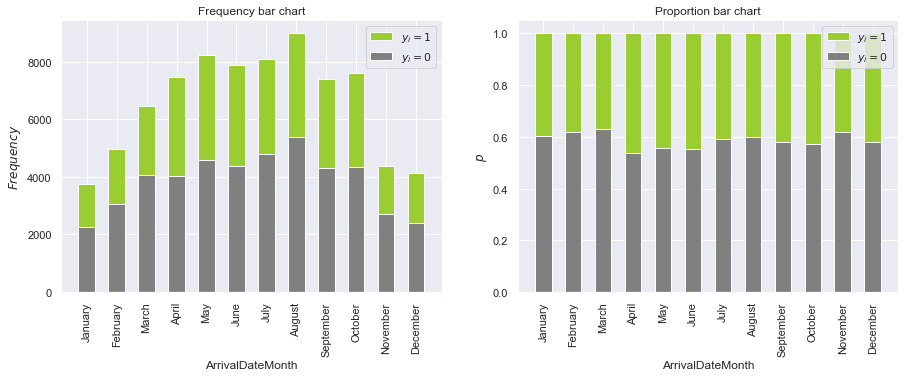

In [46]:
ordem=['January','February','March','April','May','June','July','August','September','October','November','December']
bar_charts_categorical(df,"ArrivalDateMonth", 'IsCanceled',order=ordem) 

### Backup df:

In [47]:
back=df.copy()
# df = back.copy()

### Some Data Selection

In [48]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'CRate', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ArrivalDateMonth_number', 'ArrivalDate'],
      dtype='object')

In [49]:
#drop the variable ArrivalDateYear, because future years aren´t contained in this variable, so won´t be important to train our model:
df.drop(columns=['ArrivalDateYear'],inplace=True)

# ArrivalDateMonth doesnt seem to have influence on the cancellations so it will be dropped
df.drop(columns=['ArrivalDateDayOfMonth','ArrivalDateMonth','ArrivalDateMonth_number'],inplace=True)

#The following were dropped due to their high cardinality
df.drop(columns=['Agent', 'Company','ArrivalDateWeekNumber'],inplace=True)

# The following variable will also be dropped:
df.drop(columns=['DepositType'],inplace=True)

# This created variable although helpful in understanding the data doesnt improve our models results hence will be dropped
df.drop(columns=['CRate'],inplace=True)

metric_features = update_metric_feat(df)[0]
non_metric_features = update_metric_feat(df)[1]

## Train-Test Split
(Note: we only did this step here because all the modifications and cleansing we did "don´t affect the test dataset", however to normalize the data and detect outliers this procedure is necessary beforehand")

In [50]:
data = df.iloc[:,1:]
target = df.iloc[:,0]

Train/Validation and Test:

In [51]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )

Train and Validation:

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=y_train_val
)

### Outliers detection and treatment

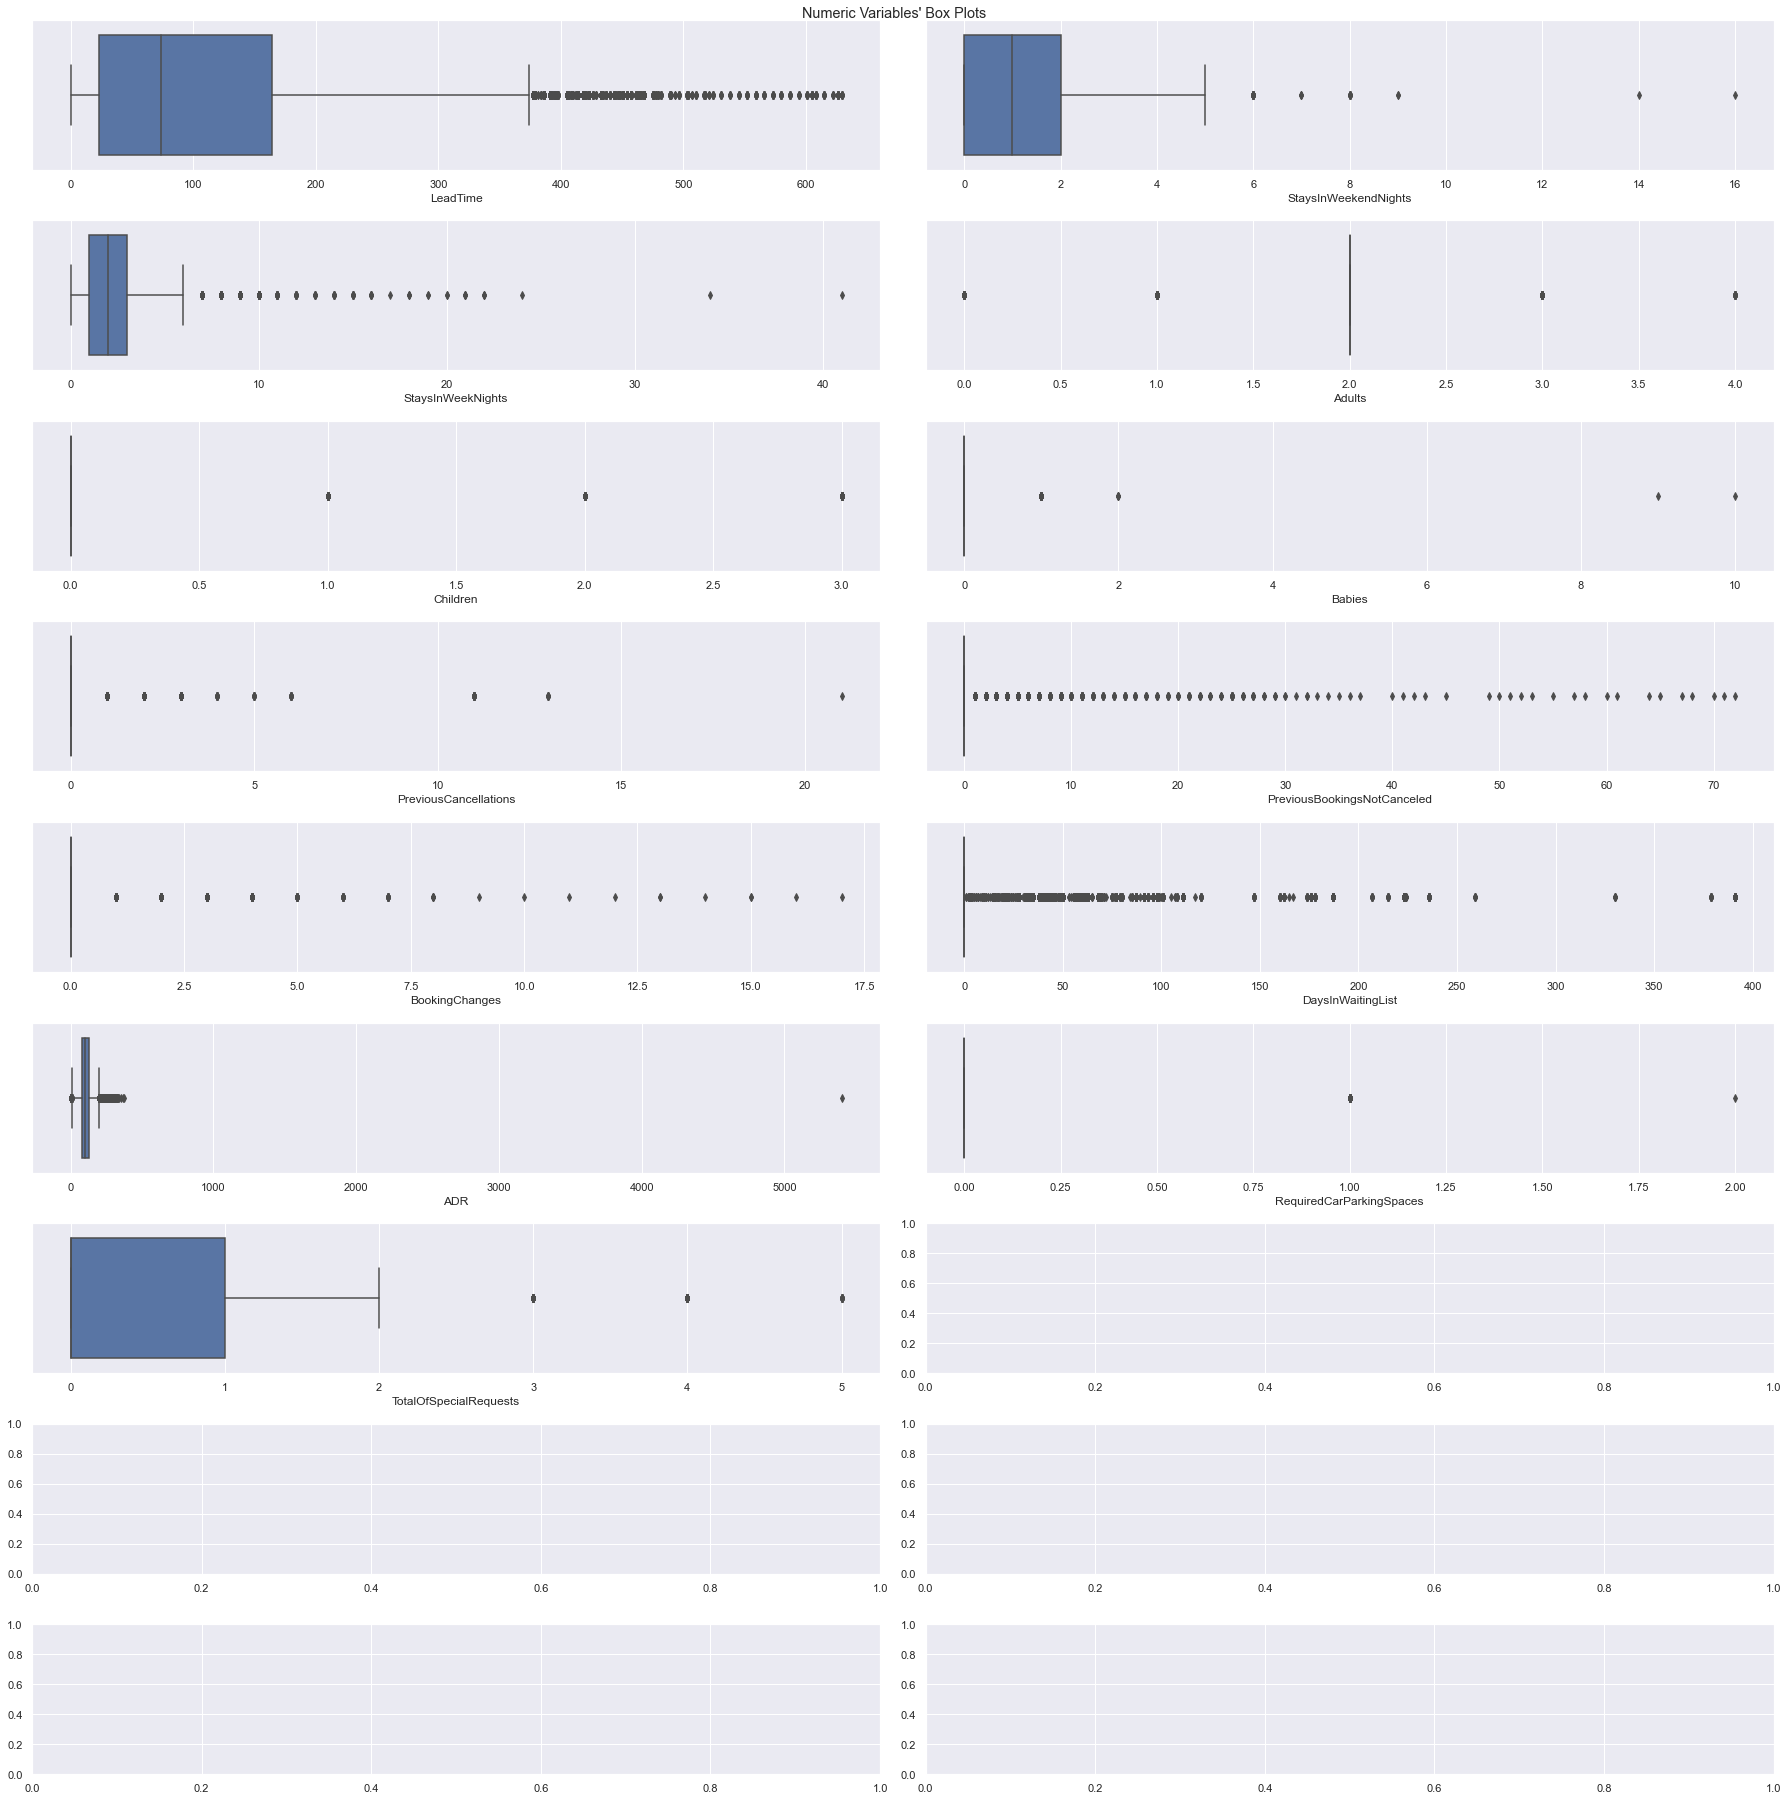

In [53]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(9, 2, figsize=(25, 25), squeeze=True)

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=X_train[feat], ax=ax)
#     ax.set_title(feat, y=-0.21)

# Adjusting my subplots:
fig.tight_layout()

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title,y=1)


plt.show()

##### Dealing with outliers on the metric features: LOF & IQR & Z_Score

Found the outliers on the train dataset

In [54]:
aux_df = X_train.copy()

In [55]:
def z_score_outlier_detection(df,column):
    mean = df[column].mean()
    std = df[column].std()
    threshold = 3
    z_s = (df[column]-mean)/std
    return z_s.apply(lambda z: z>threshold) # true if outlier

In [56]:
# Defining a function that removes the outliers from the metric features, using the IQR method:
def iqr_outlier_detection(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = (q3 - q1) 
    lower_lim = q1 - 2 * iqr
    upper_lim = q3 + 2 * iqr
    return df[column].apply(lambda x: (x < lower_lim or x > upper_lim))   # true if outlier

In [57]:
# Note that: we are only finding out outliers among the metric features:
# identifying outliers in our dataset
aux_df['outlier_lof?']=False

lof = LocalOutlierFactor(n_jobs=-1)
yhat = lof.fit_predict(aux_df[metric_features].values)
aux_df['outlier_lof?'] = yhat.copy()
aux_df['outlier_lof?'] = aux_df['outlier_lof?'].apply(lambda x: True if x==-1 else False)

In [58]:
aux_df['outlier_z_score?']=False
aux_df['outlier_iqr?']=False

for feature in metric_features:
    aux_df['outlier_z_score?'] = aux_df['outlier_z_score?']|z_score_outlier_detection(aux_df,feature)
    aux_df['outlier_iqr?'] = aux_df['outlier_iqr?']|iqr_outlier_detection(aux_df,feature)    
    
aux_df['outliers_merging_methods']=aux_df['outlier_z_score?'] & aux_df['outlier_iqr?'] & aux_df['outlier_lof?']

print('% to be eliminated =',(aux_df['outliers_merging_methods'].sum()/len(X_train))*100,'%')

# Data Frame that contains the observations that are outliers
outliers_df = aux_df[aux_df['outliers_merging_methods']==True].iloc[:,:-4]

# Dropping outliers:
df.drop(index=outliers_df.index, inplace=True)
X_train = X_train[aux_df['outliers_merging_methods']==False]

% to be eliminated = 2.386654901466448 %


### One-Hot Encoding

The following variables will be dropped before one-hot encoding due to their high cardinality

In [59]:
X_train.drop(columns=['ArrivalDate','Country'],inplace=True)
X_test.drop(columns=['ArrivalDate','Country'],inplace=True)
X_val.drop(columns=['ArrivalDate','Country'],inplace=True)
df.drop(columns=['ArrivalDate','Country'],inplace=True)
metric_features = update_metric_feat(df)[0]
non_metric_features = update_metric_feat(df)[1]

In [60]:
df_ohc = df.copy()
X_train_index=X_train.index
X_val_index=X_val.index
X_test_index=X_test.index

In [61]:
non_metric_features_aux = ['Meal','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','CustomerType']

In [62]:
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features_aux])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
aux_col =df_ohc['IsRepeatedGuest'].copy()
# ohc_df.drop(columns=['IsRepeatedGuest'],inplace=True)
ohc_df['x6_1']=aux_col
ohc_df

x0_FB  x0_SC  x1_Complementary  x1_Corporate  x1_Direct  x1_Groups  \
0        0.0    0.0               0.0           0.0        0.0        0.0   
1        0.0    0.0               0.0           0.0        0.0        0.0   
2        0.0    0.0               0.0           0.0        0.0        0.0   
3        0.0    0.0               0.0           0.0        0.0        0.0   
4        0.0    0.0               0.0           0.0        0.0        0.0   
...      ...    ...               ...           ...        ...        ...   
79325    0.0    0.0               0.0           0.0        0.0        0.0   
79326    0.0    0.0               0.0           0.0        0.0        0.0   
79327    0.0    0.0               0.0           0.0        0.0        0.0   
79328    0.0    0.0               0.0           0.0        0.0        0.0   
79329    0.0    0.0               0.0           0.0        0.0        0.0   

       x1_Offline TA/TO  x1_Online TA  x1_Undefined  x2_Direct  x2_GDS  \
0                   1.0           0.0           0.0        0.0     0.0   
1                   0.0           1.0           0.0        0.0     0.0   
2                   0.0           1.0           0.0        0.0     0.0   
3                   0.0           1.0           0.0        0.0     0.0   
4                   0.0           1.0           0.0        0.0     0.0   
...                 ...           ...           ...        ...     ...   
79325               1.0           0.0           0.0        0.0     0.0   
79326               0.0           1.0           0.0        0.0     0.0   
79327               0.0           1.0           0.0        0.0     0.0   
79328               0.0           1.0           0.0        0.0     0.0   
79329               0.0           1.0           0.0        0.0     0.0   

       x2_TA/TO  x2_Undefined  x3_B  x3_C  x3_D  x3_E  x3_F  x3_G  x3_P  x4_B  \
0           1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1           1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2           1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3           1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4           1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...           ...   ...   ...   ...   ...   ...   ...   ...   ...   
79325       1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
79326       1.0           0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
79327       1.0           0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
79328       1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
79329       1.0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       x4_C  x4_D  x4_E  x4_F  x4_G  x4_K  x4_P  x5_Group  x5_Transient  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
...     ...   ...   ...   ...   ...   ...   ...       ...           ...   
79325   0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
79326   0.0   0.0   1.0   0.0   0.0   0.0   0.0       0.0           1.0   
79327   0.0   1.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
79328   0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   
79329   0.0   0.0   0.0   0.0   0.0   0.0   0.0       0.0           1.0   

       x5_Transient-Party  x6_1  
0                     0.0     0  
1                     0.0     0  
2                     0.0     0  
3                     0.0     0  
4                     0.0     0  
...                   ...   ...  
79325                 0.0     0  
79326                 0.0     0  
79327        

In [63]:
# Reassigning df to contain ohc variables
df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
df_ohc = pd.concat([df_ohc.drop("IsCanceled",axis=1), df_ohc["IsCanceled"]],axis=1) #IsCanceled in last position
df_ohc.head()

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  \
0         6                     0                  2       1         0   
1        88                     0                  4       2         0   
2        65                     0                  4       1         0   
3        92                     2                  4       2         0   
4       100                     0                  2       2         0   

   Babies  PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  \
0       0                      0                            0               0   
1       0                      0                            0               0   
2       0                      0                            0               0   
3       0                      0                            0               0   
4       0                      0                            0               0   

   DaysInWaitingList   ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  \
0                  0   0.0                         0                       0   
1                  0  76.5                         0                       1   
2                  0  68.0                         0                       1   
3                  0  76.5                         0                       2   
4                  0  76.5                         0                       1   

   x0_FB  x0_SC  x1_Complementary  x1_Corporate  x1_Direct  x1_Groups  \
0    0.0    0.0               0.0           0.0        0.0        0.0   
1    0.0    0.0               0.0           0.0        0.0        0.0   
2    0.0    0.0               0.0           0.0        0.0        0.0   
3    0.0    0.0               0.0           0.0        0.0        0.0   
4    0.0    0.0               0.0           0.0        0.0        0.0   

   x1_Offline TA/TO  x1_Online TA  x1_Undefined  x2_Direct  x2_GDS  x2_TA/TO  \
0               1.0           0.0           0.0        0.0     0.0       1.0   
1               0.0           1.0           0.0        0.0     0.0       1.0   
2               0.0           1.0           0.0        0.0     0.0       1.0   
3               0.0           1.0           0.0        0.0     0.0       1.0   
4               0.0           1.0           0.0        0.0     0.0       1.0   

   x2_Undefined  x3_B  x3_C  x3_D  x3_E  x3_F  x3_G  x3_P  x4_B  x4_C  x4_D  \
0           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   x4_E  x4_F  x4_G  x4_K  x4_P  x5_Group  x5_Transient  x5_Transient-Party  \
0   0.0   0.0   0.0   0.0   0.0       0.0           1.0                 0.0   
1   0.0   0.0   0.0   0.0   0.0       0.0           1.0                 0.0   
2   0.0   0.0   0.0   0.0   0.0       0.0           1.0                 0.0   
3   0.0   0.0   0.0   0.0   0.0       0.0           1.0                 0.0   
4   0.0   0.0   0.0   0.0   0.0       0.0           1.0                 0.0   

   x6_1  IsCanceled  
0     0           0  
1     0           1  
2     0           1  
3     0           1  
4     0           1

In [64]:
X_train = df_ohc.loc[X_train_index,:].iloc[:,:-1].copy() 
y_train = y_train.loc[X_train_index]

X_val = df_ohc.loc[X_val_index,:].iloc[:,:-1].copy() 
X_test = df_ohc.loc[X_test_index,:].iloc[:,:-1].copy() 

### Scale/Standardize our data

In [65]:
X_train_not_standardized =X_train.copy() # these 3 lines were done so that when using random forest the metric features are 
X_val_not_standardized = X_val.copy()   # not scaled
X_test_not_standardized = X_test.copy()

df_standard_train = X_train.copy()
df_standard_val = X_val.copy()
df_standard_test = X_test.copy()
df_standard_df = df.copy()
scaler = StandardScaler()
scaled_feat_train = scaler.fit_transform(X_train[metric_features])
scaled_feat_val = scaler.transform(X_val[metric_features])
scaled_feat_test = scaler.transform(X_val[metric_features])
scaled_feat_df = scaler.transform(df[metric_features])
scaled_feat_train

array([[ 1.3286424 ,  0.26096996, -0.10067292, ..., -0.73611096,
        -0.14959541, -0.70215006],
       [ 0.68457728, -0.92929081,  0.68863947, ...,  1.30835107,
        -0.14959541, -0.70215006],
       [-0.46748287,  0.26096996,  1.47795186, ...,  0.12024571,
        -0.14959541,  0.60054116],
       ...,
       [ 1.53728322, -0.92929081, -0.10067292, ..., -1.09087998,
        -0.14959541, -0.70215006],
       [ 0.0495835 , -0.92929081, -0.10067292, ..., -1.03460804,
        -0.14959541,  0.60054116],
       [-0.89383584,  0.26096996, -0.88998531, ...,  0.65099246,
        -0.14959541,  0.60054116]])

In [66]:
# See what the fit method is doing :
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [1.09534049e+02 7.80745556e-01 2.12754509e+00 1.85721665e+00
 8.79858809e-02 4.39068486e-03 7.72674444e-02 1.09315139e-01
 1.61981835e-01 2.81959451e+00 1.05448890e+02 2.19319013e-02
 5.38999613e-01] 
 [1.21522622e+04 7.05855430e-01 1.60510025e+00 2.53557214e-01
 1.33147814e-01 4.50054454e-03 1.38147516e-01 2.72247834e+00
 2.36987747e-01 3.88074165e+02 1.52848622e+03 2.14939390e-02
 5.89273658e-01]


In [67]:
df_standard_train[metric_features] = scaled_feat_train
df_standard_val[metric_features] = scaled_feat_val
df_standard_test[metric_features] = scaled_feat_test
df_standard_df[metric_features] = scaled_feat_df
df_standard_train.head()

LeadTime  StaysInWeekendNights  StaysInWeekNights    Adults  Children  \
37235  1.328642              0.260970          -0.100673  0.283556 -0.241127   
31765  0.684577             -0.929291           0.688639  2.269478 -0.241127   
41102 -0.467483              0.260970           1.477952  0.283556 -0.241127   
8828  -0.449340              0.260970          -0.100673  0.283556 -0.241127   
56034 -0.512840              0.260970           0.688639  2.269478 -0.241127   

         Babies  PreviousCancellations  PreviousBookingsNotCanceled  \
37235 -0.065449              -0.207886                    -0.066252   
31765 -0.065449              -0.207886                    -0.066252   
41102 -0.065449               2.482586                    -0.066252   
8828  -0.065449              -0.207886                    -0.066252   
56034 -0.065449              -0.207886                    -0.066252   

       BookingChanges  DaysInWaitingList       ADR  RequiredCarParkingSpaces  \
37235       -0.332739           -0.14313 -0.736111                 -0.149595   
31765       -0.332739           -0.14313  1.308351                 -0.149595   
41102       -0.332739           -0.14313  0.120246                 -0.149595   
8828        -0.332739           -0.14313 -0.326093                 -0.149595   
56034       -0.332739           -0.14313  1.440846                 -0.149595   

       TotalOfSpecialRequests  x0_FB  x0_SC  x1_Complementary  x1_Corporate  \
37235               -0.702150    0.0    0.0               0.0           0.0   
31765               -0.702150    0.0    0.0               0.0           0.0   
41102                0.600541    0.0    0.0               0.0           0.0   
8828                 0.600541    0.0    0.0               0.0           0.0   
56034                0.600541    0.0    0.0               0.0           0.0   

       x1_Direct  x1_Groups  x1_Offline TA/TO  x1_Online TA  x1_Undefined  \
37235        0.0        0.0               1.0           0.0           0.0   
31765        0.0        0.0               0.0           1.0           0.0   
41102        0.0        0.0               0.0           1.0           0.0   
8828         0.0        0.0               0.0           1.0           0.0   
56034        0.0        0.0               0.0           1.0           0.0   

       x2_Direct  x2_GDS  x2_TA/TO  x2_Undefined  x3_B  x3_C  x3_D  x3_E  \
37235        0.0     0.0       1.0           0.0   0.0   0.0   0.0   0.0   
31765        0.0     0.0       1.0           0.0   0.0   0.0   1.0   0.0   
41102        0.0     0.0       1.0           0.0   0.0   0.0   1.0   0.0   
8828         0.0     0.0       1.0           0.0   0.0   0.0   0.0   0.0   
56034        0.0     0.0       1.0           0.0   0.0   0.0   1.0   0.0   

       x3_F  x3_G  x3_P  x4_B  x4_C  x4_D  x4_E  x4_F  x4_G  x4_K  x4_P  \
37235   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
31765   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
41102   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
8828    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
56034   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   

       x5_Group  x5_Transient  x5_Transient-Party  x6_1  
37235       0.0           0.0                 1.0     0  
31765       0.0           1.0                 0.0     0  
41102       0.0           1.0                 0.0     0  
8828        0.0           1.0                 0.0     0  
56034       0.0           1.0                 0.0     0

In [68]:
# Checking mean and variance of standardized variables
df_standard_train[metric_features].describe().round(2)

LeadTime  StaysInWeekendNights  StaysInWeekNights    Adults  Children  \
count  46462.00              46462.00           46462.00  46462.00  46462.00   
mean       0.00                  0.00               0.00      0.00     -0.00   
std        1.00                  1.00               1.00      1.00      1.00   
min       -0.99                 -0.93              -1.68     -3.69     -0.24   
25%       -0.78                 -0.93              -0.89      0.28     -0.24   
50%       -0.32                  0.26              -0.10      0.28     -0.24   
75%        0.49                  1.45               0.69      0.28     -0.24   
max        4.69                 15.73              25.16      4.26      7.98   

         Babies  PreviousCancellations  PreviousBookingsNotCanceled  \
count  46462.00               46462.00                     46462.00   
mean      -0.00                   0.00                        -0.00   
std        1.00                   1.00                         1.00   
min       -0.07                  -0.21                        -0.07   
25%       -0.07                  -0.21                        -0.07   
50%       -0.07                  -0.21                        -0.07   
75%       -0.07                  -0.21                        -0.07   
max       29.75                  34.77                        43.57   

       BookingChanges  DaysInWaitingList       ADR  RequiredCarParkingSpaces  \
count        46462.00           46462.00  46462.00                  46462.00   
mean            -0.00               0.00      0.00                     -0.00   
std              1.00               1.00      1.00                      1.00   
min             -0.33              -0.14     -2.70                     -0.15   
25%             -0.33              -0.14     -0.67                     -0.15   
50%             -0.33              -0.14     -0.14                     -0.15   
75%             -0.33              -0.14      0.53                     -0.15   
max             14.05              19.70      5.54                     13.49   

       TotalOfSpecialRequests  
count                46462.00  
mean                    -0.00  
std                      1.00  
min                     -0.70  
25%                     -0.70  
50%                     -0.70  
75%                      0.60  
max                      5.81

In [69]:
X_train = df_standard_train.copy()
X_val = df_standard_val.copy()
X_test = df_standard_test.copy()
df = df_standard_df.copy()

In [70]:
X_train.head()

LeadTime  StaysInWeekendNights  StaysInWeekNights    Adults  Children  \
37235  1.328642              0.260970          -0.100673  0.283556 -0.241127   
31765  0.684577             -0.929291           0.688639  2.269478 -0.241127   
41102 -0.467483              0.260970           1.477952  0.283556 -0.241127   
8828  -0.449340              0.260970          -0.100673  0.283556 -0.241127   
56034 -0.512840              0.260970           0.688639  2.269478 -0.241127   

         Babies  PreviousCancellations  PreviousBookingsNotCanceled  \
37235 -0.065449              -0.207886                    -0.066252   
31765 -0.065449              -0.207886                    -0.066252   
41102 -0.065449               2.482586                    -0.066252   
8828  -0.065449              -0.207886                    -0.066252   
56034 -0.065449              -0.207886                    -0.066252   

       BookingChanges  DaysInWaitingList       ADR  RequiredCarParkingSpaces  \
37235       -0.332739           -0.14313 -0.736111                 -0.149595   
31765       -0.332739           -0.14313  1.308351                 -0.149595   
41102       -0.332739           -0.14313  0.120246                 -0.149595   
8828        -0.332739           -0.14313 -0.326093                 -0.149595   
56034       -0.332739           -0.14313  1.440846                 -0.149595   

       TotalOfSpecialRequests  x0_FB  x0_SC  x1_Complementary  x1_Corporate  \
37235               -0.702150    0.0    0.0               0.0           0.0   
31765               -0.702150    0.0    0.0               0.0           0.0   
41102                0.600541    0.0    0.0               0.0           0.0   
8828                 0.600541    0.0    0.0               0.0           0.0   
56034                0.600541    0.0    0.0               0.0           0.0   

       x1_Direct  x1_Groups  x1_Offline TA/TO  x1_Online TA  x1_Undefined  \
37235        0.0        0.0               1.0           0.0           0.0   
31765        0.0        0.0               0.0           1.0           0.0   
41102        0.0        0.0               0.0           1.0           0.0   
8828         0.0        0.0               0.0           1.0           0.0   
56034        0.0        0.0               0.0           1.0           0.0   

       x2_Direct  x2_GDS  x2_TA/TO  x2_Undefined  x3_B  x3_C  x3_D  x3_E  \
37235        0.0     0.0       1.0           0.0   0.0   0.0   0.0   0.0   
31765        0.0     0.0       1.0           0.0   0.0   0.0   1.0   0.0   
41102        0.0     0.0       1.0           0.0   0.0   0.0   1.0   0.0   
8828         0.0     0.0       1.0           0.0   0.0   0.0   0.0   0.0   
56034        0.0     0.0       1.0           0.0   0.0   0.0   1.0   0.0   

       x3_F  x3_G  x3_P  x4_B  x4_C  x4_D  x4_E  x4_F  x4_G  x4_K  x4_P  \
37235   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
31765   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
41102   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
8828    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
56034   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   

       x5_Group  x5_Transient  x5_Transient-Party  x6_1  
37235       0.0           0.0                 1.0     0  
31765       0.0           1.0                 0.0     0  
41102       0.0           1.0                 0.0     0  
8828        0.0           1.0                 0.0     0  
56034       0.0           1.0                 0.0     0

### Feature Selection

##### Feature Selection - Metric Features

In [71]:
data = X_train[metric_features].copy()
target = y_train.copy()

In [72]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    X_train1, X_test1, y_train1, y_test1 = train_test_split(data,target, test_size = 0.3, random_state = 0, stratify = target)
    
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train1,y_train1)
    X_test_rfe = rfe.transform(X_test1)
    model.fit(X_train_rfe,y_train1)
    y_pred = model.predict(X_test_rfe)
    
    score = f1_score(y_test1, y_pred, average='micro')
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.701844


##### Feature Selection - Categorical Features 
Done on the non metric features on their original format(without being one hot encoded), and using the train dataset

In [73]:
df_scaled= df.loc[X_train_index,:].copy()
df_cffs=df_scaled[non_metric_features+['IsCanceled']].astype(object).copy()
df_cffs

Meal  MarketSegment DistributionChannel  \
37235  1 and 2 meal packages  Offline TA/TO               TA/TO   
31765  1 and 2 meal packages      Online TA               TA/TO   
41102  1 and 2 meal packages      Online TA               TA/TO   
8828   1 and 2 meal packages      Online TA               TA/TO   
56034  1 and 2 meal packages      Online TA               TA/TO   
...                      ...            ...                 ...   
17829                     SC      Online TA               TA/TO   
17926  1 and 2 meal packages  Offline TA/TO               TA/TO   
33724  1 and 2 meal packages         Groups               TA/TO   
46795  1 and 2 meal packages         Groups               TA/TO   
58724  1 and 2 meal packages      Online TA               TA/TO   

      ReservedRoomType AssignedRoomType     CustomerType IsRepeatedGuest  \
37235                A                D  Transient-Party               0   
31765                D                D        Transient               0   
41102                D                D        Transient               0   
8828                 A                A        Transient               0   
56034                D                D        Transient               0   
...                ...              ...              ...             ...   
17829                A                A        Transient               0   
17926                A                A  Transient-Party               0   
33724                A                A  Transient-Party               1   
46795                A                A  Transient-Party               0   
58724                D                D        Transient               0   

      IsCanceled  
37235          0  
31765          1  
41102          1  
8828           1  
56034          0  
...          ...  
17829          1  
17926          1  
33724          1  
46795          0  
58724          0  

[46462 rows x 8 columns]

In [74]:
chi2_check = []
for feature in non_metric_features:
    if chi2_contingency(pd.crosstab(df_cffs['IsCanceled'], df_cffs[feature]))[1] < 0.05:
        chi2_check.append('Important Feature')
    else:
        chi2_check.append('Not an Important Feature')
res = pd.DataFrame(data = [non_metric_features, chi2_check] 
             ).T 
res.columns = ['Column', 'Feature Importance']
res

Column Feature Importance
0                 Meal  Important Feature
1        MarketSegment  Important Feature
2  DistributionChannel  Important Feature
3     ReservedRoomType  Important Feature
4     AssignedRoomType  Important Feature
5         CustomerType  Important Feature
6      IsRepeatedGuest  Important Feature

#### Post-Hoc Testing

In [75]:
check = {}
for i in res[res['Feature Importance'] == 'Important Feature']['Column']:
    dummies = pd.get_dummies(df_cffs[i])
    bon_p_value = 0.05/df_cffs[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df_cffs['IsCanceled'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Keep Feature'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis - Not Important'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

Pair  \
0      Meal-1 and 2 meal packages   
1                         Meal-FB   
2                         Meal-SC   
3          MarketSegment-Aviation   
4     MarketSegment-Complementary   
5         MarketSegment-Corporate   
6            MarketSegment-Direct   
7            MarketSegment-Groups   
8     MarketSegment-Offline TA/TO   
9         MarketSegment-Online TA   
10        MarketSegment-Undefined   
11  DistributionChannel-Corporate   
12     DistributionChannel-Direct   
13        DistributionChannel-GDS   
14      DistributionChannel-TA/TO   
15  DistributionChannel-Undefined   
16             ReservedRoomType-A   
17             ReservedRoomType-B   
18             ReservedRoomType-C   
19             ReservedRoomType-D   
20             ReservedRoomType-E   
21             ReservedRoomType-F   
22             ReservedRoomType-G   
23             ReservedRoomType-P   
24             AssignedRoomType-A   
25             AssignedRoomType-B   
26             AssignedRoomType-C   
27             AssignedRoomType-D   
28             AssignedRoomType-E   
29             AssignedRoomType-F   
30             AssignedRoomType-G   
31             AssignedRoomType-K   
32             AssignedRoomType-P   
33          CustomerType-Contract   
34             CustomerType-Group   
35         CustomerType-Transient   
36   CustomerType-Transient-Party   
37              IsRepeatedGuest-0   
38              IsRepeatedGuest-1   

                                        Hypothesis  
0                                     Keep Feature  
1                                     Keep Feature  
2                                     Keep Feature  
3                                     Keep Feature  
4                                     Keep Feature  
5                                     Keep Feature  
6                                     Keep Feature  
7                                     Keep Feature  
8   Fail to Reject Null Hypothesis - Not Important  
9                                     Keep Feature  
10  Fail to Reject Null Hypothesis - Not Important  
11                                    Keep Feature  
12                                    Keep Feature  
13                                    Keep Feature  
14                                    Keep Feature  
15  Fail to Reject Null Hypothesis - Not Important  
16                                    Keep Feature  
17                                    Keep Feature  
18  Fail to Reject Null Hypothesis - Not Important  
19                                    Keep Feature  
20                                    Keep Feature  
21  Fail to Reject Null Hypothesis - Not Important  
22                                    Keep Feature  
23  Fail to Reject Null Hypothesis - Not Important  
24                                    Keep Feature  
25                                    Keep Feature  
26                                    Keep Feature  
27                                    Keep Feature  
28                                    Keep Feature  
29                                    Keep Feature  
30                                    Keep Feature  
31                                    Keep Feature  
32  Fail to Reject Null Hypothesis - Not Important  
33                                    Keep Feature  
34                                    Keep Feature  
35                                    Keep Feature  
36                                    Keep Feature  
37                                    Keep Feature  
38                                    Keep Feature

##### Feature Selection - All features (one-hot encoded categorical features)

In [76]:
sel1 = SelectFromModel(RandomForestClassifier(n_estimators = 500),threshold = 0.005)
sel2 = SelectFromModel(GradientBoostingClassifier(n_estimators=300), threshold = 0.005)
sel1.fit(X_train_not_standardized,y_train)
sel2.fit(X_train,y_train)

SelectFromModel(estimator=GradientBoostingClassifier(n_estimators=300),
                threshold=0.005)

In [77]:
selected_feat_RFC= X_train_not_standardized.columns[(sel1.get_support())]
selected_feat_GBC= X_train.columns[(sel2.get_support())]

In [78]:
print("Selected features with RFC and threshold = 0.005: \n")
for i in selected_feat_RFC: print(i,",",sep='', end=' ')

Selected features with RFC and threshold = 0.005: 

LeadTime, StaysInWeekendNights, StaysInWeekNights, Adults, Children, PreviousCancellations, BookingChanges, DaysInWaitingList, ADR, RequiredCarParkingSpaces, TotalOfSpecialRequests, x0_SC, x1_Direct, x1_Groups, x1_Offline TA/TO, x1_Online TA, x2_Direct, x2_TA/TO, x3_D, x4_D, x5_Transient, x5_Transient-Party, 

In [79]:
print("Selected features with GBC and threshold = 0.005: \n")
for i in selected_feat_GBC: print(i,",",sep='', end=' ')

Selected features with GBC and threshold = 0.005: 

LeadTime, PreviousCancellations, PreviousBookingsNotCanceled, BookingChanges, DaysInWaitingList, ADR, RequiredCarParkingSpaces, TotalOfSpecialRequests, x1_Direct, x1_Groups, x1_Offline TA/TO, x1_Online TA, x2_TA/TO, x3_D, x4_D, x5_Transient, x5_Transient-Party, 

In [80]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [81]:
X_train.columns

Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'Babies', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'x0_FB',
       'x0_SC', 'x1_Complementary', 'x1_Corporate', 'x1_Direct', 'x1_Groups',
       'x1_Offline TA/TO', 'x1_Online TA', 'x1_Undefined', 'x2_Direct',
       'x2_GDS', 'x2_TA/TO', 'x2_Undefined', 'x3_B', 'x3_C', 'x3_D', 'x3_E',
       'x3_F', 'x3_G', 'x3_P', 'x4_B', 'x4_C', 'x4_D', 'x4_E', 'x4_F', 'x4_G',
       'x4_K', 'x4_P', 'x5_Group', 'x5_Transient', 'x5_Transient-Party',
       'x6_1'],
      dtype='object')

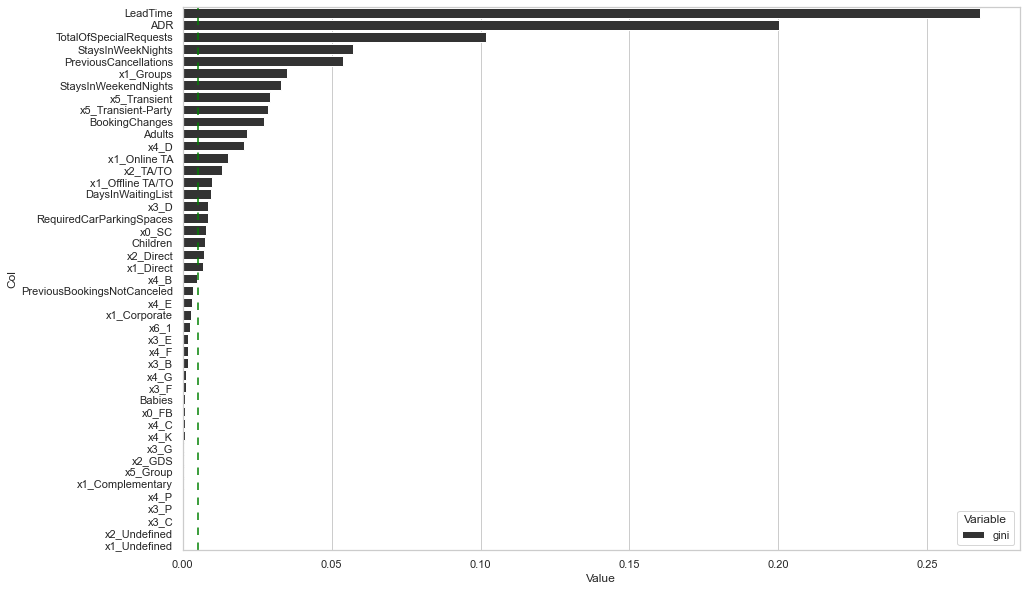

In [82]:
clf = RandomForestClassifier(n_estimators = 500)

clf.fit(X_train_not_standardized, y_train)

# Checking the attribute gini importance
gini_importance = clf.feature_importances_
zippy = pd.DataFrame(gini_importance, columns =['gini'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)


# Plotting
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(data))
plt.figure(figsize=(15,10))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy, palette=np.array(pal[::-10]))
plt.axvline(x=0.005, color='green', linestyle=(0,(5,5)))

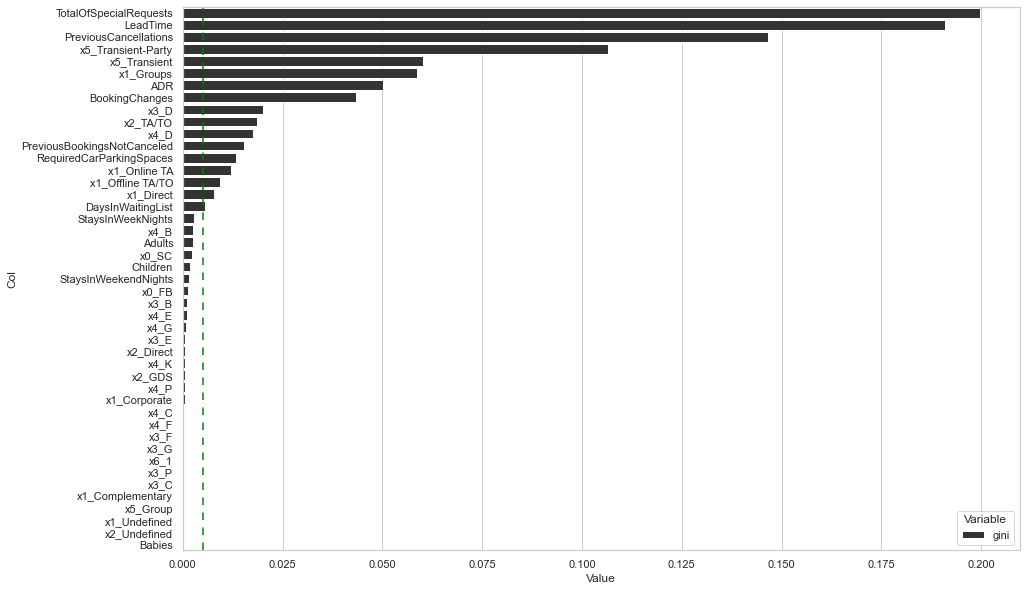

In [83]:
clf = GradientBoostingClassifier(n_estimators = 300)

clf.fit(X_train, y_train)

# Checking the attribute gini importance
gini_importance = clf.feature_importances_
zippy = pd.DataFrame(gini_importance, columns =['gini'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

# Plotting
plt.figure(figsize=(15,10))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy, palette=np.array(pal[::-10]))
plt.axvline(x=0.005, color='green', linestyle=(0,(5,5)))

### Selected features 

Only using the RF importance to select them

In [84]:
selected_features=selected_feat_RFC.to_list()
selected_features

['LeadTime',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'PreviousCancellations',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'x0_SC',
 'x1_Direct',
 'x1_Groups',
 'x1_Offline TA/TO',
 'x1_Online TA',
 'x2_Direct',
 'x2_TA/TO',
 'x3_D',
 'x4_D',
 'x5_Transient',
 'x5_Transient-Party']

## 4. MODELLING <a class="anchor" id="4"></a>

1st step: manual tunning to understand the best ranges for the different hyper parameters of the models, by evaluating the increase/decrease of the f1 score and crossval score

2nd: Now, we can better define the grid of parameters to build for the different models in order to perform grid/randomized search

Scoring Function:

In [85]:
def score(y_val,y_pred, fazer_cv=False):
    if fazer_cv==True:
        scores = cross_val_score(clf, X_train, y_train, cv=3) 
        print("Average cross validation score: {:.3f}".format(scores.mean()))
    print('Micro f1 score:', f1_score(y_val, y_pred, average='micro'))
    print("AUC score:",roc_auc_score(y_val, y_pred))
    print('\nResults on the data set:')
    print(classification_report(y_true = y_val, y_pred = y_pred))

## 4.1. Build Model <a class="anchor" id="4.1"></a>

#### Used variables

In [86]:
X_train.columns

Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'Babies', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'x0_FB',
       'x0_SC', 'x1_Complementary', 'x1_Corporate', 'x1_Direct', 'x1_Groups',
       'x1_Offline TA/TO', 'x1_Online TA', 'x1_Undefined', 'x2_Direct',
       'x2_GDS', 'x2_TA/TO', 'x2_Undefined', 'x3_B', 'x3_C', 'x3_D', 'x3_E',
       'x3_F', 'x3_G', 'x3_P', 'x4_B', 'x4_C', 'x4_D', 'x4_E', 'x4_F', 'x4_G',
       'x4_K', 'x4_P', 'x5_Group', 'x5_Transient', 'x5_Transient-Party',
       'x6_1'],
      dtype='object')

In [87]:
# other tested models:
# clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.7)->0.7914408168410437
# clf = AdaBoostClassifier(n_estimators=354, learning_rate=1.2)->0.792134123282491 [after randomized search]
# clf = DecisionTreeClassifier(random_state=0)->0.8054960292449262
# clf = VotingClassifier(estimators=estimators, voting='hard',n_jobs=-1)->0.852325727

### 4.1.1. Model 1: RandomForestClassifier <a class="anchor" id="4.1.1"></a>
Trained on X_train without it being standardized

In [88]:
clf = RandomForestClassifier(n_estimators = 500,random_state=0)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train_not_standardized, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val_not_standardized)
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test_not_standardized)
score(y_test,y_pred)

print('\n\n-------MODEL WITH THE SELECTED FEATURES-------\n') 
clf.fit(X_train_not_standardized[selected_features], y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val_not_standardized[selected_features])
score(y_val,y_pred)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test_not_standardized[selected_features])
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Average cross validation score: 0.845
Micro f1 score: 0.8487961679062146
AUC score: 0.8376623058358542

Results on the data set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      9246
           1       0.85      0.77      0.81      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.84     15866
weighted avg       0.85      0.85      0.85     15866


Performance on the test data set:
Micro f1 score: 0.8515063658136897
AUC score: 0.8416608341453118

Results on the data set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      9246
           1       0.85      0.78      0.81      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.85     15866
weighted avg       0.85      0.85      0.85     15866



------

###  <font color='red'>4.1.2. Model 2: RandomForestClassifier - Chosen Model</font> <a class="anchor" id="4.1.2"></a>
#### Tuned using Randomized Search

Trained on X_train without it being standardized

In [89]:
# # # RandomizedSearchCV on RandomForestClassifier
# param_dist = {'n_estimators':sp_randint(300,600),'max_depth':sp_randint(15,30),'min_samples_split':sp_randint(2,10),
#                 'max_features':['sqrt', 'log2'],'min_samples_leaf':sp_randint(1,10)}

# pre_gs_inst = RandomizedSearchCV(RandomForestClassifier(random_state=0),param_distributions = param_dist,cv=3,n_iter = 200,n_jobs=-1,scoring='f1_micro')
# pre_gs_inst.fit(X_train, y_train)
# pre_gs_inst.best_params_

# {'max_depth': 28,
#  'max_features': 'log2',
#  'min_samples_leaf': 1,
#  'min_samples_split': 3,
#  'n_estimators': 444}

In [90]:
clf = RandomForestClassifier(n_estimators = 500,max_features='log2',min_samples_leaf=1,min_samples_split=3,random_state=0)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train_not_standardized, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val_not_standardized)
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test_not_standardized)
score(y_test,y_pred)

print('\n\n-------MODEL WITH THE SELECTED FEATURES-------\n') 
clf.fit(X_train_not_standardized[selected_features], y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val_not_standardized[selected_features])
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test_not_standardized[selected_features])
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Average cross validation score: 0.848
Micro f1 score: 0.8499936972141686
AUC score: 0.8385181670787009

Results on the data set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      9246
           1       0.86      0.77      0.81      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.84     15866
weighted avg       0.85      0.85      0.85     15866


Performance on the test data set:
Micro f1 score: 0.8531450901298374
AUC score: 0.842723627364295

Results on the data set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      9246
           1       0.86      0.78      0.82      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.85     15866
weighted avg       0.85      0.85      0.85     15866



-------

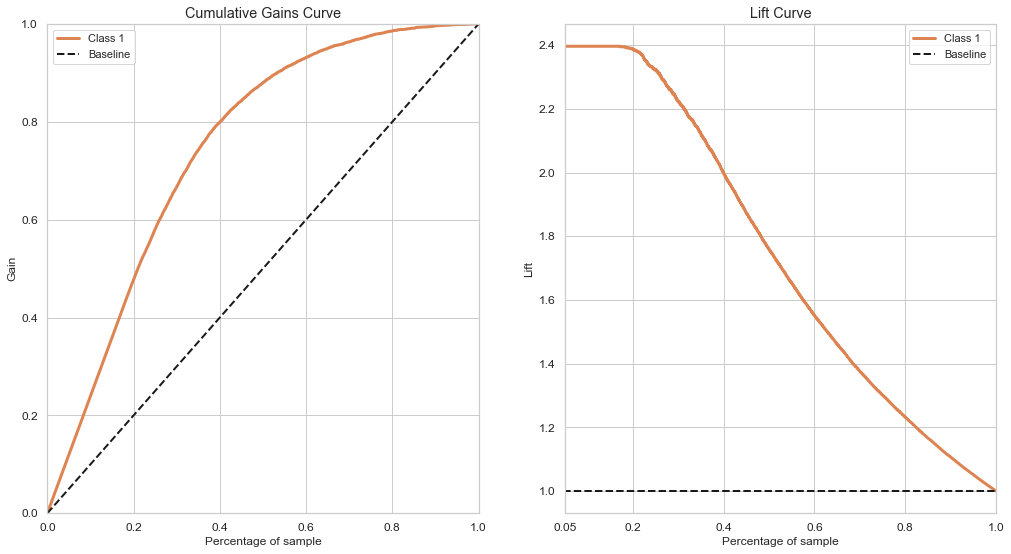

In [91]:
# Plot lift curves


clf.fit(X_train_not_standardized, y_train)


predicted_probas = clf.predict_proba(X_test_not_standardized)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

<AxesSubplot:xlabel='Value', ylabel='Col'>

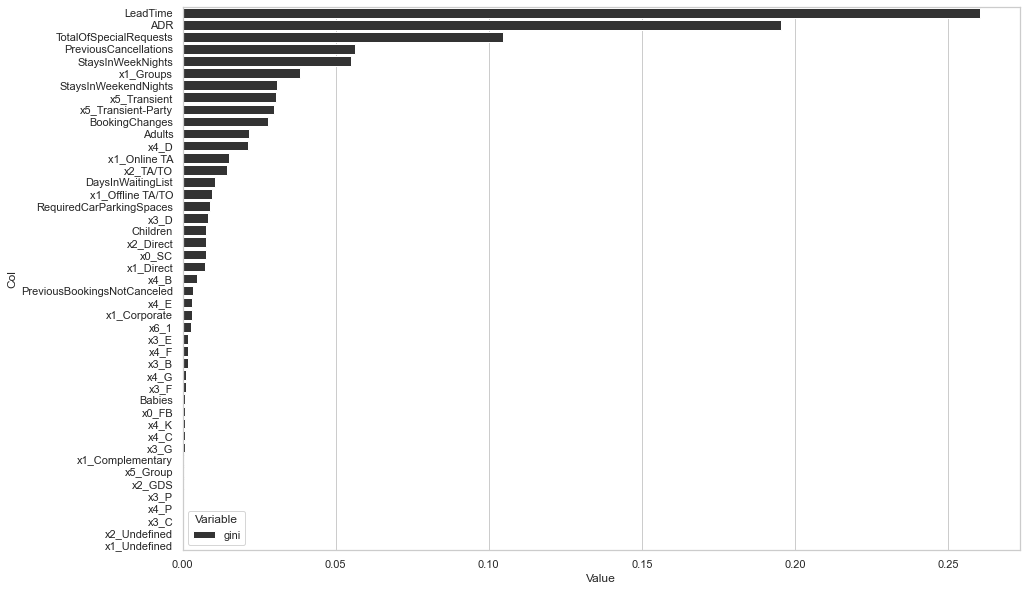

In [92]:
# Checking the attribute gini importance
gini_importance = clf.feature_importances_
zippy = pd.DataFrame(gini_importance, columns =['gini'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)


# Plotting
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(data))
plt.figure(figsize=(15,10))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy, palette=np.array(pal[::-10]))
# plt.axvline(x=0.005, color='green', linestyle=(0,(5,5)))

### 4.1.3. Model 3: DecisionTreeClassifier tuned using RandomizedSearchCV <a class="anchor" id="4.1.3"></a>

Trained on X_train without it being standardized

In [93]:
# # # RandomizedSearchCV on DT
# param_dist = {'criterion' : ["gini", "entropy"],'max_depth':sp_randint(15,30),'min_samples_split':sp_randint(2,10),
#                 'max_features':['sqrt', 'log2'],'min_samples_leaf':sp_randint(1,10)}

# pre_gs_inst = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),param_distributions = param_dist,cv=5,n_iter = 2000,n_jobs=-1,scoring='f1_micro')
# pre_gs_inst.fit(X_train, y_train)
# pre_gs_inst.best_params_

# {'criterion': 'entropy',
#  'max_depth': 29,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 8}

In [94]:
clf=DecisionTreeClassifier(criterion= 'entropy',random_state=0,max_depth=29,max_features='sqrt',min_samples_split=8)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train_not_standardized, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val_not_standardized)
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test_not_standardized)
score(y_test,y_pred)

print('\n\n-------MODEL WITH THE SELECTED FEATURES-------\n') 
clf.fit(X_train_not_standardized[selected_features], y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val_not_standardized[selected_features])
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test_not_standardized[selected_features])
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Average cross validation score: 0.813
Micro f1 score: 0.8207487709567629
AUC score: 0.8079347123570378

Results on the data set:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      9246
           1       0.82      0.73      0.77      6620

    accuracy                           0.82     15866
   macro avg       0.82      0.81      0.81     15866
weighted avg       0.82      0.82      0.82     15866


Performance on the test data set:
Micro f1 score: 0.8220093281230303
AUC score: 0.8103247881177327

Results on the data set:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      9246
           1       0.82      0.74      0.78      6620

    accuracy                           0.82     15866
   macro avg       0.82      0.81      0.81     15866
weighted avg       0.82      0.82      0.82     15866



------

### 4.1.4. Model 4: GradientBoostingClassifier  <a class="anchor" id="4.1.4"></a>

In [95]:
clf = GradientBoostingClassifier(max_depth=10,min_samples_leaf=1,n_estimators=380,subsample=0.8,random_state=10)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val)
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test)
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Average cross validation score: 0.846
Micro f1 score: 0.8515063658136897
AUC score: 0.8421542131716303

Results on the data set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      9246
           1       0.85      0.79      0.82      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.85     15866
weighted avg       0.85      0.85      0.85     15866


Performance on the test data set:
Micro f1 score: 0.5712845077524266
AUC score: 0.5468321403621587

Results on the data set:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      9246
           1       0.48      0.40      0.44      6620

    accuracy                           0.57     15866
   macro avg       0.55      0.55      0.55     15866
weighted avg       0.56      0.57      0.56     15866



### 4.1.5. Model 5: GradientBoostingClassifier tuned using Randomized Search <a class="anchor" id="4.1.5"></a>

In [96]:
# Randomized Search on GradientBoostingClassifier
# begin=time.time()

# param_dist = {'n_estimators':sp_randint(300,400),'min_samples_leaf':sp_randint(1,13),'max_depth':range(7,13,1),
#  'learning_rate' : [0.05,0.1,0.15,0.2,0.3],'min_samples_split':sp_randint(1,11),'subsample':[0.6,0.7,0.8,0.9,1]}

# pre_gs_inst = RandomizedSearchCV(GradientBoostingClassifier(),param_distributions = param_dist,cv=3,n_iter = 50, n_jobs=-1,
#                                  scoring='f1_micro')
# pre_gs_inst.fit(X_train, y_train)

# print('Time to run:',time.time()-begin)

# pre_gs_inst.best_params_

# {'learning_rate': 0.05,
#  'max_depth': 10,
#  'min_samples_leaf': 3,
#  'min_samples_split': 2,
#  'n_estimators': 349,
#  'subsample': 0.7}

In [97]:
clf = GradientBoostingClassifier(learning_rate =0.05,max_depth=10,min_samples_leaf=3,min_samples_split=2,n_estimators=349,
                                subsample=0.7)
print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val)
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test)
score(y_test,y_pred)

print('\n\n-------MODEL WITH THE SELECTED FEATURES-------\n') 
clf.fit(X_train[selected_features], y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test[selected_features])
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Average cross validation score: 0.849
Micro f1 score: 0.8493634186310348
AUC score: 0.8385994792881776

Results on the data set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      9246
           1       0.85      0.77      0.81      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.84     15866
weighted avg       0.85      0.85      0.85     15866


Performance on the test data set:
Micro f1 score: 0.5726080927770074
AUC score: 0.5476459976486934

Results on the data set:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      9246
           1       0.49      0.40      0.44      6620

    accuracy                           0.57     15866
   macro avg       0.55      0.55      0.55     15866
weighted avg       0.56      0.57      0.56     15866



------

### 4.1.6. Model 6: HistGradientBoostingClassifier <a class="anchor" id="4.1.6"></a>

In [98]:
clf = HistGradientBoostingClassifier(learning_rate=0.5,random_state=0,max_depth=9,max_iter=81,min_samples_leaf=10,
                                   l2_regularization=0.3)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val)
score(y_val,y_pred)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test)
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Micro f1 score: 0.8378923484180008
AUC score: 0.8255825986316938

Results on the data set:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      9246
           1       0.84      0.75      0.79      6620

    accuracy                           0.84     15866
   macro avg       0.84      0.83      0.83     15866
weighted avg       0.84      0.84      0.84     15866


Performance on the test data set:
Micro f1 score: 0.5763267364174965
AUC score: 0.5559848694266746

Results on the data set:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      9246
           1       0.49      0.43      0.46      6620

    accuracy                           0.58     15866
   macro avg       0.56      0.56      0.56     15866
weighted avg       0.57      0.58      0.57     15866



### 4.1.7. Model 7: HistGradientBoostingClassifier tuned using Randomized Search <a class="anchor" id="4.1.7"></a>

In [99]:
# # RandomizedSearchCV on HistGradientBoostingClassifier
# param_dist = {'min_samples_leaf':sp_randint(4,14),'max_depth':range(6,12,1),
#               'learning_rate' : [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_iter':sp_randint(50,120), 
#               'l2_regularization':[0.2,0.3,0.4]}

# pre_gs_inst = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=0),param_distributions = param_dist,cv=3,n_iter = 200,n_jobs=-1,scoring='f1_micro')
# pre_gs_inst.fit(X_train, y_train)
# pre_gs_inst.best_params_

# {'l2_regularization': 0.3,
#  'learning_rate': 0.3,
#  'max_depth': 10,
#  'max_iter': 116,
#  'min_samples_leaf': 13}

In [100]:
clf=HistGradientBoostingClassifier(random_state=0,l2_regularization=0.3,learning_rate=0.3,max_depth=10,max_iter=116,min_samples_leaf=13)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val)
score(y_val,y_pred)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test)
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Micro f1 score: 0.8388377662927013
AUC score: 0.8261577963329287

Results on the data set:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      9246
           1       0.85      0.75      0.80      6620

    accuracy                           0.84     15866
   macro avg       0.84      0.83      0.83     15866
weighted avg       0.84      0.84      0.84     15866


Performance on the test data set:
Micro f1 score: 0.5813059372242532
AUC score: 0.5607074636014725

Results on the data set:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      9246
           1       0.50      0.44      0.47      6620

    accuracy                           0.58     15866
   macro avg       0.56      0.56      0.56     15866
weighted avg       0.57      0.58      0.58     15866



### 4.1.8. Model 8: StackingClassifier <a class="anchor" id="4.1.8"></a>

In [101]:
# Classifiers used as estimators:
clf1 = GradientBoostingClassifier(max_depth=10,min_samples_leaf=1,n_estimators=380,subsample=0.8,random_state=10)
clf2 = GradientBoostingClassifier(learning_rate =0.05,max_depth=10,min_samples_leaf=3,min_samples_split=2,n_estimators=349,
                                subsample=0.7)
clf3 = HistGradientBoostingClassifier(random_state=0,l2_regularization=0.3,learning_rate=0.3,max_depth=10,max_iter=116,min_samples_leaf=13)


estimators = [('clf1', clf1),('clf2', clf2),('clf3', clf3)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val)
score(y_val,y_pred)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test)
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Micro f1 score: 0.8516324215303164
AUC score: 0.8421336604773323

Results on the data set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      9246
           1       0.85      0.78      0.82      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.85     15866
weighted avg       0.85      0.85      0.85     15866


Performance on the test data set:
Micro f1 score: 0.573049287785201
AUC score: 0.5498907995161457

Results on the data set:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      9246
           1       0.49      0.41      0.44      6620

    accuracy                           0.57     15866
   macro avg       0.55      0.55      0.55     15866
weighted avg       0.56      0.57      0.57     15866



### 4.1.9. Model 9: StackingClassifier <a class="anchor" id="4.1.9"></a>

In [102]:
# Classifiers used as estimators:
clf1 = GradientBoostingClassifier(max_depth=10,min_samples_leaf=1,n_estimators=380,subsample=0.8,random_state=10)
clf2 = HistGradientBoostingClassifier(learning_rate=0.5,random_state=0,max_depth=9,max_iter=81,min_samples_leaf=10,
                                   l2_regularization=0.3)
clf3 = HistGradientBoostingClassifier(random_state=0,l2_regularization=0.3,learning_rate=0.3,max_depth=10,max_iter=116,min_samples_leaf=13)


estimators = [('clf1', clf1),('clf2', clf2),('clf3', clf3)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

print('-------MODEL WITH ALL THE FEATURES-------\n') 
clf.fit(X_train, y_train)
print("Performance on the validation data set:")
y_pred = clf.predict(X_val)
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = clf.predict(X_test)
score(y_test,y_pred)

-------MODEL WITH ALL THE FEATURES-------

Performance on the validation data set:
Average cross validation score: 0.850
Micro f1 score: 0.853586285138031
AUC score: 0.8443248913713319

Results on the data set:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9246
           1       0.85      0.79      0.82      6620

    accuracy                           0.85     15866
   macro avg       0.85      0.84      0.85     15866
weighted avg       0.85      0.85      0.85     15866


Performance on the test data set:
Micro f1 score: 0.5738056220849616
AUC score: 0.5517195481936175

Results on the data set:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      9246
           1       0.49      0.42      0.45      6620

    accuracy                           0.57     15866
   macro avg       0.55      0.55      0.55     15866
weighted avg       0.57      0.57      0.57     15866



### 4.1.10. Model 10: Deep neural network 1 <a class="anchor" id="4.1.10"></a>

In [103]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model
model1 = build_model()
model1.fit(X_train, y_train,epochs=100,batch_size=512,validation_data=(X_val, y_val))

print('-------MODEL WITH ALL THE FEATURES-------\n') 
print("Performance on the validation data set:")
y_pred = model1.predict_classes(X_val)
score(y_val,y_pred)
print("\nPerformance on the test data set:")
y_pred = model1.predict_classes(X_test)
score(y_test,y_pred)

Epoch 1/100
91/91 [==============================] - 4s 34ms/step - loss: 0.5257 - accuracy: 0.7408 - val_loss: 0.4523 - val_accuracy: 0.7921
Epoch 2/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4421 - accuracy: 0.7947 - val_loss: 0.4434 - val_accuracy: 0.7994
Epoch 3/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4279 - accuracy: 0.7981 - val_loss: 0.4313 - val_accuracy: 0.8015
Epoch 4/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4218 - accuracy: 0.8023 - val_loss: 0.4339 - val_accuracy: 0.8094
Epoch 5/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4112 - accuracy: 0.8087 - val_loss: 0.4368 - val_accuracy: 0.8025
Epoch 6/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4142 - accuracy: 0.8067 - val_loss: 0.4286 - val_accuracy: 0.8075
Epoch 7/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4106 - accuracy: 0.8081 - val_loss: 0.4295 - val_accuracy: 0.8110
Epoch 

### 4.1.11. Model 11: Deep neural network 2 <a class="anchor" id="4.1.11"></a>

In [104]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['accuracy'])
    return model
model=build_model()
model.fit(X_train, y_train,epochs=100,batch_size=512,validation_data=(X_val, y_val))#

print('-------MODEL WITH ALL THE FEATURES-------\n') 
print("Performance on the validation data set:")
y_pred = model.predict_classes(X_val)
score(y_val,y_pred,fazer_cv=True)
print("\nPerformance on the test data set:")
y_pred = model.predict_classes(X_test)
score(y_test,y_pred)

Epoch 1/100
91/91 [==============================] - 2s 11ms/step - loss: 0.5582 - accuracy: 0.7220 - val_loss: 0.4590 - val_accuracy: 0.7897
Epoch 2/100
91/91 [==============================] - 1s 8ms/step - loss: 0.4632 - accuracy: 0.7855 - val_loss: 0.4464 - val_accuracy: 0.7938
Epoch 3/100
91/91 [==============================] - 1s 9ms/step - loss: 0.4448 - accuracy: 0.7940 - val_loss: 0.4429 - val_accuracy: 0.7957
Epoch 4/100
91/91 [==============================] - 1s 9ms/step - loss: 0.4370 - accuracy: 0.7950 - val_loss: 0.4369 - val_accuracy: 0.7991
Epoch 5/100
91/91 [==============================] - 1s 9ms/step - loss: 0.4288 - accuracy: 0.8016 - val_loss: 0.4368 - val_accuracy: 0.8022
Epoch 6/100
91/91 [==============================] - 1s 9ms/step - loss: 0.4232 - accuracy: 0.8056 - val_loss: 0.4358 - val_accuracy: 0.8005
Epoch 7/100
91/91 [==============================] - 1s 9ms/step - loss: 0.4197 - accuracy: 0.8041 - val_loss: 0.4327 - val_accuracy: 0.8059
Epoch 8/100


### 4.1.12. Model 12: Deep neural network 3 <a class="anchor" id="4.1.12"></a>

In [105]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

model3=build_model()
model3.fit(X_train, y_train,epochs=100,batch_size=512,validation_data=(X_val, y_val))

print('-------MODEL WITH ALL THE FEATURES-------\n') 
print("Performance on the validation data set:")
y_pred = model3.predict_classes(X_val)
score(y_val,y_pred)
print("\nPerformance on the test data set:")
y_pred = model3.predict_classes(X_test)
score(y_test,y_pred)

Epoch 1/100
91/91 [==============================] - 2s 18ms/step - loss: 0.5203 - accuracy: 0.7430 - val_loss: 0.4519 - val_accuracy: 0.7907
Epoch 2/100
91/91 [==============================] - 1s 15ms/step - loss: 0.4409 - accuracy: 0.7918 - val_loss: 0.4399 - val_accuracy: 0.7972
Epoch 3/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4306 - accuracy: 0.7977 - val_loss: 0.4368 - val_accuracy: 0.7947
Epoch 4/100
91/91 [==============================] - 1s 16ms/step - loss: 0.4167 - accuracy: 0.8055 - val_loss: 0.4320 - val_accuracy: 0.8032
Epoch 5/100
91/91 [==============================] - 1s 15ms/step - loss: 0.4135 - accuracy: 0.8056 - val_loss: 0.4276 - val_accuracy: 0.8055
Epoch 6/100
91/91 [==============================] - 1s 15ms/step - loss: 0.4076 - accuracy: 0.8076 - val_loss: 0.4273 - val_accuracy: 0.8066
Epoch 7/100
91/91 [==============================] - 1s 15ms/step - loss: 0.4075 - accuracy: 0.8080 - val_loss: 0.4236 - val_accuracy: 0.8083
Epoch 

Epoch 58/100
91/91 [==============================] - 2s 17ms/step - loss: 0.3533 - accuracy: 0.8367 - val_loss: 0.4756 - val_accuracy: 0.8286
Epoch 59/100
91/91 [==============================] - 2s 18ms/step - loss: 0.3547 - accuracy: 0.8373 - val_loss: 0.4711 - val_accuracy: 0.8288
Epoch 60/100
91/91 [==============================] - 2s 17ms/step - loss: 0.3507 - accuracy: 0.8391 - val_loss: 0.4734 - val_accuracy: 0.8290
Epoch 61/100
91/91 [==============================] - 1s 16ms/step - loss: 0.3478 - accuracy: 0.8403 - val_loss: 0.4760 - val_accuracy: 0.8269
Epoch 62/100
91/91 [==============================] - 1s 16ms/step - loss: 0.3496 - accuracy: 0.8401 - val_loss: 0.4753 - val_accuracy: 0.8279
Epoch 63/100
91/91 [==============================] - 1s 16ms/step - loss: 0.3488 - accuracy: 0.8398 - val_loss: 0.4797 - val_accuracy: 0.8264
Epoch 64/100
91/91 [==============================] - 1s 16ms/step - loss: 0.3487 - accuracy: 0.8404 - val_loss: 0.4803 - val_accuracy: 0.8285

# 5. Evaluation <a class="anchor" id="5"></a>

### Results on the test dataset

In [106]:
# models to test:

# GB
GB = GradientBoostingClassifier(max_depth=10,min_samples_leaf=1,n_estimators=380,subsample=0.8,random_state=10)

# DT
DT = DecisionTreeClassifier(criterion= 'entropy',random_state=0,max_depth=29,max_features='sqrt',min_samples_split=8)

# RF
RF = RandomForestClassifier(n_estimators = 500,max_features='log2',min_samples_leaf=1,min_samples_split=3,random_state=0)

#Stacking
estimators = [('clf1', GradientBoostingClassifier(max_depth=10,min_samples_leaf=1,n_estimators=380,subsample=0.8,random_state=10)),
              ('clf2', HistGradientBoostingClassifier(learning_rate=0.5,random_state=0,max_depth=9,max_iter=81,min_samples_leaf=10,
                                   l2_regularization=0.3)),
              ('clf3', HistGradientBoostingClassifier(random_state=0,l2_regularization=0.3,learning_rate=0.3,max_depth=10,max_iter=116,min_samples_leaf=13)
)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

In [107]:
scores=[]

# GB
GB.fit(X_train, y_train) 
y_pred = GB.predict(X_test)
scores.append(f1_score(y_test, y_pred, average='micro'))

# DT
DT.fit(X_train_not_standardized, y_train) 
y_pred = DT.predict(X_test_not_standardized)
scores.append(f1_score(y_test, y_pred, average='micro'))

# RF
RF.fit(X_train_not_standardized, y_train) 
y_pred = RF.predict(X_test_not_standardized)
scores.append(f1_score(y_test, y_pred, average='micro'))

# Stacking
stacking_clf.fit(X_train, y_train) 
y_pred = stacking_clf.predict(X_test)
scores.append(f1_score(y_test, y_pred, average='micro'))

# NN
y_pred = model.predict_classes(X_test)
scores.append(f1_score(y_test, y_pred, average='micro'))

In [108]:
diction={'Gradient Boosting': scores[0],'Decision Tree': scores[1],'Random Forest':scores[2],
        'Stacking':scores[3], 'NN':scores[4]}
results=pd.DataFrame(diction.items())
results = results.rename(columns={0: 'Model',1:'F1-score on the test dataset'})
results

Model  F1-score on the test dataset
0  Gradient Boosting                      0.571285
1      Decision Tree                      0.822009
2      Random Forest                      0.853145
3           Stacking                      0.573806
4                 NN                      0.589815

In [109]:
X_train.columns

Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'Babies', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'x0_FB',
       'x0_SC', 'x1_Complementary', 'x1_Corporate', 'x1_Direct', 'x1_Groups',
       'x1_Offline TA/TO', 'x1_Online TA', 'x1_Undefined', 'x2_Direct',
       'x2_GDS', 'x2_TA/TO', 'x2_Undefined', 'x3_B', 'x3_C', 'x3_D', 'x3_E',
       'x3_F', 'x3_G', 'x3_P', 'x4_B', 'x4_C', 'x4_D', 'x4_E', 'x4_F', 'x4_G',
       'x4_K', 'x4_P', 'x5_Group', 'x5_Transient', 'x5_Transient-Party',
       'x6_1'],
      dtype='object')

# 6. Deployment <a class="anchor" id="6"></a>

### Impact of a variation of the variable value on the target (ceteri paribus)

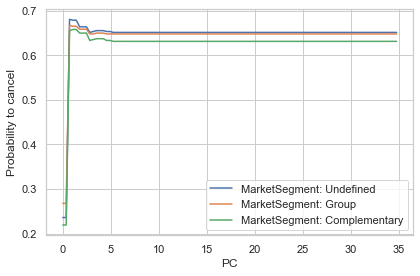

In [110]:
n0=100
PC = np.linspace(0, max(df['PreviousCancellations']), n0)

 

metric = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'Babies', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

NewTrain = pd.DataFrame(0,  index=range(0,n0), columns=X_train.columns)
for i in metric:
    NewTrain[i] = X_train[i].mean()

NewTrain['PreviousCancellations'] = PC

Train0 = NewTrain.copy()
Train1 = NewTrain.copy()
Train2 = NewTrain.copy()

Train0['x1_Undefined'] = 1
Train1['x1_Groups'] = 1
Train2['x1_Complementary'] = 1

Prob0 = RF.predict_proba(Train0)
Prob1 = RF.predict_proba(Train1)
Prob2 = RF.predict_proba(Train2)

plt.plot(PC,Prob0.T[1], label='MarketSegment: Undefined')
plt.plot(PC,Prob1.T[1],label='MarketSegment: Group')
plt.plot(PC,Prob2.T[1],label='MarketSegment: Complementary')

plt.xlabel('PC')
plt.ylabel('Probability to cancel')
plt.legend()
plt.tight_layout()
plt.show()

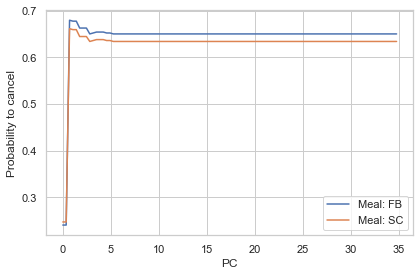

In [111]:
Train3 = NewTrain.copy()
Train4 = NewTrain.copy()

Train3['x0_FB'] = 1
Train4['x0_SC'] = 1

Prob3 = RF.predict_proba(Train3)
Prob4 = RF.predict_proba(Train4)

plt.plot(PC,Prob3.T[1], label='Meal: FB')
plt.plot(PC,Prob4.T[1],label='Meal: SC')

plt.xlabel('PC')
plt.ylabel('Probability to cancel')
plt.legend()
plt.tight_layout()
plt.show()

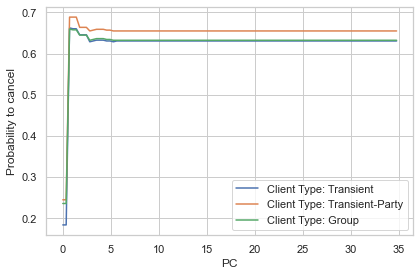

In [112]:
Train5 = NewTrain.copy()
Train6 = NewTrain.copy()
Train7 = NewTrain.copy()

Train5['x5_Transient'] = 1
Train6['x5_Transient-Party'] = 1
Train7['x5_Group'] = 1

Prob5 = RF.predict_proba(Train5)
Prob6 = RF.predict_proba(Train6)
Prob7 = RF.predict_proba(Train7)

plt.plot(PC,Prob5.T[1], label='Client Type: Transient')
plt.plot(PC,Prob6.T[1],label='Client Type: Transient-Party')
plt.plot(PC,Prob7.T[1],label='Client Type: Group')

plt.xlabel('PC')
plt.ylabel('Probability to cancel')
plt.legend()
plt.tight_layout()
plt.show()

### Some testing for the app deployment

In [113]:
df_para_testar = pd.read_csv(os.path.join(PROJECT_ROOT, 'data', 'H2.csv'))
df_para_testar.head(10)

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   
5           1        79             2015             July   
6           0         3             2015             July   
7           1        63             2015             July   
8           1        62             2015             July   
9           1        62             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   
5                     27                      2                     0   
6                     27                      2                     0   
7                     27                      2                     1   
8                     27                      2                     2   
9                     27                      2                     2   

   StaysInWeekNights  Adults  Children  Babies       Meal Country  \
0                  2       1       0.0       0  HB            PRT   
1                  4       2       0.0       0  BB            PRT   
2                  4       1       0.0       0  BB            PRT   
3                  4       2       0.0       0  BB            PRT   
4                  2       2       0.0       0  BB            PRT   
5                  3       2       0.0       0  BB            PRT   
6                  3       1       0.0       0  HB            PRT   
7                  3       1       0.0       0  BB            PRT   
8                  3       2       0.0       0  BB            PRT   
9                  3       2       0.0       0  BB            PRT   

   MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  \
0  Offline TA/TO               TA/TO                0                      0   
1      Online TA               TA/TO                0                      0   
2      Online TA               TA/TO                0                      0   
3      Online TA               TA/TO                0                      0   
4      Online TA               TA/TO                0                      0   
5      Online TA               TA/TO                0                      0   
6         Groups               TA/TO                0                      0   
7      Online TA               TA/TO                0                      0   
8      Online TA               TA/TO                0                      0   
9      Online TA               TA/TO                0                      0   

   PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  \
0                            0  A                 A                  
1                            0  A                 A                  
2                            0  A                 A                  
3                            0  A                 A                  
4                            0  A                 A                  
5                            0  A                 A                  
6                            0  A                 A                  
7                            0  A                 A                  
8                            0  A                 A                  
9                            0  A                 A                  

   BookingChanges      DepositType        Agent      Company  \
0               0  No Deposit                 6    

In [115]:
# joblib.dump(ohc, 'ohc.pkl')
ohc_from_joblib = joblib.load('ohc.pkl') 

# # save the final model to the disk
# joblib.dump(RF, 'RF.pkl')
RF_from_joblib = joblib.load('RF.pkl') 

In [116]:
# X_train.columns

# LeadTime
# StaysInWeekendNights
# StaysInWeekNights
# Adults
# Children
# Babies
# PreviousCancellations
# PreviousBookingsNotCanceled
# BookingChanges
# DaysInWaitingList
# ADR
# RequiredCarParkingSpaces
# TotalOfSpecialRequests
# Meal [x0_FB,x0_SC ]
# MarketSegment [x1_Complementary,x1_Corporate,x1_Direct,x1_Groups,'x1_Offline TA/TO', 'x1_Online TA', 'x1_Undefined']
# DistributionChannel ['x2_Direct','x2_GDS', 'x2_TA/TO', 'x2_Undefined']
# ReservedRoomType ['x3_B', 'x3_C', 'x3_D', 'x3_E','x3_F', 'x3_G', 'x3_P']
# AssignedRoomType['x4_B', 'x4_C', 'x4_D', 'x4_E', 'x4_F', 'x4_G','x4_K', 'x4_P']
# CustomerType ['x5_Group', 'x5_Transient', 'x5_Transient-Party']
# IsRepeatedGuest ['x6_1']

In [117]:
# Categorical variables
Meal_var ='HB'
MarketSegment_var ='Offline TA/TO'
DistributionChannel_var = 'TA/TO'
ReservedRoomType_var = 'A'
AssignedRoomType_var = 'A'
CustomerType_var = 'Transient'
IsRepeatedGuest_var = 0

In [118]:
if Meal_var =='HB':
    Meal_var = "1 and 2 meal packages"
if Meal_var =='BB':
    Meal_var = "1 and 2 meal packages"
sample_of_categ = np.array([Meal_var,MarketSegment_var,DistributionChannel_var,ReservedRoomType_var,AssignedRoomType_var,CustomerType_var]
).reshape(1, -1)   

In [119]:
# ohc_from_joblib.transform(sample_of_categ)
sample_of_categ = np.append(ohc_from_joblib.transform(sample_of_categ), IsRepeatedGuest_var)
sample_of_categ

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [120]:
# Metric Features
LeadTime = 6
StaysInWeekendNights = 0
StaysInWeekNights = 2
Adults=1
Children=0
Babies=0
PreviousCancellations=0
PreviousBookingsNotCanceled=0
BookingChanges=0
DaysInWaitingList=0
ADR=0
RequiredCarParkingSpaces=0
TotalOfSpecialRequests=0

metric_vars =[LeadTime, StaysInWeekendNights, StaysInWeekNights, Adults,Children, Babies, PreviousCancellations,
PreviousBookingsNotCanceled, BookingChanges, DaysInWaitingList,ADR, RequiredCarParkingSpaces, TotalOfSpecialRequests]
metric_vars

[6, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [121]:
sample = np.append(metric_vars,sample_of_categ)
sample

array([6., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [122]:
print('Probabilities:',RF_from_joblib.predict_proba(sample.reshape(1, -1)))
print('Predicted cass:', RF_from_joblib.predict(sample.reshape(1, -1)))

Probabilities: [[0.64273333 0.35726667]]
Predicted cass: [0]


In [124]:
# pip freeze > requirements.txt